/home/vasumv/zeugma/scripts/process_data.py:112: SyntaxWarning: invalid escape sequence '\#'
  axis.set(ylabel = "\# Increased Branch Coverage")


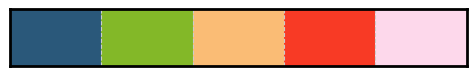

In [1]:
import seaborn as sns
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from process_data import process_mutation_data

%load_ext autoreload
%autoreload 2

from statistical_test import *
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [42]:
def violin_plot_for_mutation_distance(df, experiment_name, fig_name, split=True, inner='quart', density_norm='area', width=0.8, x_order=None):
    # tol palette, color-blind friendly
    plt.rcParams.update({'axes.edgecolor': 'black', 'axes.linewidth': 2, 'axes.grid': True, 'grid.linestyle': '--'})
    plt.rcParams['figure.figsize'] = 7, 3
    custom_palette = {'Zest-all': '#DD8452', 'Zest-saved': '#BEBADA', 'Zeugma-saved': '#BEBADA', 'EI-all': '#4C72B0', 'Zeugma-all': '#4C72B0', 'BeDivFuzz-all': '#4C72B0'}
    tmp_ax = sns.violinplot(data=df, x='benchmark_name', y='mutation_string', hue='algorithm',
                            split=split, inner=inner, density_norm=density_norm, palette=custom_palette,
                            width=width, linewidth=1.0, order=x_order, common_norm=True, saturation=1, dodge=True)
    sns.move_legend(tmp_ax, "lower center", bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False)
    for l in tmp_ax.lines:
        l.set_linestyle(':')
        l.set_linewidth(1)
        l.set_color('black')
        l.set_alpha(0.8)
    for l in tmp_ax.lines[1::3]:
        l.set_linestyle('-')
        l.set_linewidth(1.6)
        l.set_color('#F7F056')
        l.set_alpha(0.8)

    # get rid of ticks for empty columns (levels)
    if x_order:
        x_arr = np.array(x_order)
        position_arr = np.array(range(0, len(x_order)))
        positions = [p for p, order in zip(position_arr, x_arr) if 'NA' not in order]
        filtered_x = [e for e in list(x_order) if 'NA' not in e]
        tmp_ax.set_xticks(positions)
        tmp_ax.set_xticklabels(filtered_x)
        plt.xticks(rotation=30)

    tmp_ax.set(xlabel='Benchmark', ylabel='Mutation Distance (%)')
    # tmp_ax.grid(False)
    plt.savefig('./figs/{}_{}.pdf'.format(experiment_name, fig_name), bbox_inches='tight', pad_inches=0.1)

In [43]:
def box_plot_for_mutation_distance(df, experiment_name, fig_name):
    tmp_ax = sns.boxplot(data=df, x='benchmark_name', y='mutation', hue='algorithm')
    sns.move_legend(tmp_ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
    plt.savefig('./figs/{}_{}.png'.format(experiment_name, fig_name), dpi=300)

In [44]:
def beautify_stats_table(groupby):
    stats = groupby.describe()
    processed_stats = stats.loc[:, (slice(None), ['', 'count', '50%', 'mean', 'std', 'min', 'max'])].rename(columns={'50%':'median'})
    return processed_stats

def bar_plot_for_median_mutation_distance(stats_df, experiment_name, fig_name):
    # get the median values
    median_mutation_df = stats_df.loc[:, (slice(None), ['', 'median'])]
    # flatten the index
    median_mutation_df.columns = median_mutation_df.columns.get_level_values(0)
    # reorder the index
    # median_mutation_df = median_mutation_df.reindex([0, 5, 6, 1, 2, 3, 4, 7, 12, 13, 8, 9, 10, 11]).reset_index(drop=True)
    # bar plot
    tmp_ax = sns.barplot(median_mutation_df, x='benchmark_name', y='mutation', hue='algorithm')
    sns.move_legend(tmp_ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
    plt.savefig('./figs/{}_{}.png'.format(experiment_name, fig_name), dpi=300)

In [45]:
# statistical tests
def mann_whitney_u_test_for_mutation_distance(df, groupby, alg1_name, alg2_name):
    # TODO: remove either df or groupby
    result_dict = {}
    test_names = ['two-sided', 'less']
    measures = ['p', 'A_12', 'U1', 'U2', 'r1', 'r2']
    indices = []
    for name in test_names:
        indices += ['{}_{}'.format(name, measure) for measure in measures]

    # Warning: large and unequal sample sizes will result in timeout; debugging required
    for benchmark_name in df.benchmark_name.unique():
        print('testing {}...'.format(benchmark_name))
        alg1_data = groupby.get_group((alg1_name, benchmark_name)).mutation.values
        alg2_data = groupby.get_group((alg2_name, benchmark_name)).mutation.values
        print('sample1 size: {}, sample2 size: {}'.format(len(alg1_data), len(alg2_data)))
        result_two_sided = mann_whitney_u_test(alg1_data, alg2_data, alternative=test_names[0], verbose=False)
        result_one_sided = mann_whitney_u_test(alg1_data, alg2_data, alternative=test_names[1], verbose=False)
        result_dict[benchmark_name] = list(result_two_sided) + list(result_one_sided)
    # create the dataframe
    stats_df = pd.DataFrame(result_dict, index=indices)
    return stats_df

In [2]:
process_mutation_data("/data/aoli/havoc_eval/havoc-dist", [False, True], ["random", "zest-mini", "zest", "ei", "bedivfuzz-structure", "zeugma-linked"], 'mutations')
# process_mutation_data("/data/aoli/havoc_eval/havoc-test", [False, True], ["zest", "ei", "bedivfuzz-simple", "bedivfuzz-structure", "zeugma-linked"], 'mutation_byte', "byte_")

ant random
ant random
ant zest-mini
ant zest-mini
ant zest
ant zest
ant ei
ant ei
ant bedivfuzz-structure
ant bedivfuzz-structure
ant zeugma-linked
ant zeugma-linked
processing ant...
maven random
maven random
maven zest-mini
maven zest-mini
maven zest
maven zest
maven ei
maven ei
maven bedivfuzz-structure
maven bedivfuzz-structure
maven zeugma-linked
maven zeugma-linked
processing maven...
rhino random
rhino random
rhino zest-mini
rhino zest-mini
rhino zest
rhino zest
rhino ei
rhino ei
rhino bedivfuzz-structure
rhino bedivfuzz-structure
rhino zeugma-linked
rhino zeugma-linked
processing rhino...
closure random
closure random
closure zest-mini
closure zest-mini
closure zest
closure zest
closure ei
closure ei
closure bedivfuzz-structure
closure bedivfuzz-structure
closure zeugma-linked
closure zeugma-linked
processing closure...
chocopy random
chocopy random
chocopy zest-mini
chocopy zest-mini
chocopy zest
chocopy zest
chocopy ei
chocopy ei
chocopy bedivfuzz-structure
chocopy bedivfuzz-

In [10]:
mutation_df = pd.read_pickle("./mutations.pkl")
new_label_names = {
    'zest': 'Zest',
    'zest-saved_only': 'Zest-saved',
    'ei': 'EI',
    'ei-saved_only': 'EI-saved',
    'zeugma-linked': 'Zeugma',
    'zeugma-linked-saved_only': 'Zeugma-saved',
    'bedivfuzz-structure': 'BeDivFuzz',
    'bedivfuzz-structure-saved_only': 'BeDivFuzz-saved',
    'random-saved_only': 'Random-saved',
    'random': 'Random',
    'zest-mini': 'Zest-Mini',
    'zest-mini-saved_only': 'Zest-Mini-saved'
    }
mutation_df['algorithm'] = mutation_df['algorithm'].map(new_label_names)
mutation_df['mutation_distance_diff'] = mutation_df['mutation_string'] - mutation_df['mutation_bytes']
display(mutation_df[mutation_df.isna().any(axis=1)])

mutation_df = mutation_df.dropna()
zest_df = mutation_df[mutation_df['algorithm'].str.contains('Zest')]
# ei_df = mutation_df[~mutation_df.index.isin(zest_df.index)]
all_input_df = mutation_df[~mutation_df['algorithm'].str.contains('saved')]

mutation_bytes  mutation_string     algorithm  current_len  \
190570         0.485714         0.328000          Zest          125   
190654         0.294118         0.324074          Zest          102   
190762         0.676471         0.305556          Zest           77   
190768         0.823529         0.480000          Zest          150   
190912         0.117647         0.245614          Zest          114   
...                 ...              ...           ...          ...   
2907840        0.855707         0.899160  Zeugma-saved         1785   
2907848        0.050967         0.039683  Zeugma-saved          252   
2907851        0.158070         0.262745  Zeugma-saved          255   
2907873        0.449912         0.606426  Zeugma-saved          184   
2907975        0.949013         1.000000  Zeugma-saved            0   

         parent_len  saved  parent   result parent_result benchmark_name  \
190570          108  False       0  INVALID           NaN            ant   
190654          108  False       0  INVALID           NaN            ant   
190762          108  False       0  INVALID           NaN            ant   
190768          108  False       0  INVALID           NaN            ant   
190912          108  False       0  INVALID           NaN            ant   
...             ...    ...     ...      ...           ...            ...   
2907840         249   True       0  SUCCESS           NaN        jackson   
2907848         249   True       0  SUCCESS           NaN        jackson   
2907851         249   True       0  SUCCESS           NaN        jackson   
2907873         249   True       0  SUCCESS           NaN        jackson   
2907975         249   True       0  FAILURE           NaN        jackson   

         mutation_distance_diff  
190570                -0.157714  
190654                 0.029956  
190762                -0.370915  
190768                -0.343529  
190912                 0.127967  
...                         ...  
2907840                0.043453  
2907848               -0.011284  
2907851                0.104675  
2907873                0.156514  
2907975                0.050987  

[13425 rows x 11 columns]

In [11]:
all_input_df

mutation_bytes  mutation_string algorithm  current_len  parent_len  \
0              0.967742         0.447761    Random           93         134   
1              0.964286         0.568750    Random          160         151   
2              0.986111         0.587065    Random          201         178   
3              0.972222         0.544944    Random          126         178   
4              0.984127         0.601124    Random           82         178   
...                 ...              ...       ...          ...         ...   
2907821        0.987034         0.986125    Zeugma         1009          14   
2907822        0.885572         0.876033    Zeugma          121          18   
2907823        0.859935         0.855346    Zeugma          159          30   
2907824        0.972021         0.960352    Zeugma          454          19   
2907825        0.972028         0.968121    Zeugma          596          19   

         saved  parent   result parent_result benchmark_name  \
0        False      23  INVALID       SUCCESS            ant   
1        False      41  INVALID       SUCCESS            ant   
2        False      40  INVALID       SUCCESS            ant   
3        False      40  INVALID       SUCCESS            ant   
4        False      50  INVALID       SUCCESS            ant   
...        ...     ...      ...           ...            ...   
2907821  False    1547  SUCCESS       SUCCESS        jackson   
2907822  False    7310  SUCCESS       SUCCESS        jackson   
2907823  False   12437  SUCCESS       SUCCESS        jackson   
2907824  False   12169  SUCCESS       SUCCESS        jackson   
2907825  False   20606  SUCCESS       SUCCESS        jackson   

         mutation_distance_diff  
0                     -0.519981  
1                     -0.395536  
2                     -0.399046  
3                     -0.427278  
4                     -0.383003  
...                         ...  
2907821               -0.000909  
2907822               -0.009539  
2907823               -0.004589  
2907824               -0.011668  
2907825               -0.003907  

[2874678 rows x 11 columns]

In [12]:
non_zero_mutation_df = mutation_df[mutation_df['mutation_string'] != 0]
non_zero_zest_df = non_zero_mutation_df[mutation_df['algorithm'].str.contains('Zest')]
non_zero_all_input_df = non_zero_mutation_df[mutation_df['algorithm'].str.contains('all')]

# Filter out inputs with zero length
all_input_df_nonzero_len = all_input_df[(all_input_df['parent_len'] != 0) & (all_input_df['current_len'] != 0)]

/tmp/ipykernel_2387301/177115576.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_zero_zest_df = non_zero_mutation_df[mutation_df['algorithm'].str.contains('Zest')]
/tmp/ipykernel_2387301/177115576.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  non_zero_all_input_df = non_zero_mutation_df[mutation_df['algorithm'].str.contains('all')]


In [13]:
all_input_df_nonzero_len

mutation_bytes  mutation_string algorithm  current_len  parent_len  \
0              0.967742         0.447761    Random           93         134   
1              0.964286         0.568750    Random          160         151   
2              0.986111         0.587065    Random          201         178   
3              0.972222         0.544944    Random          126         178   
4              0.984127         0.601124    Random           82         178   
...                 ...              ...       ...          ...         ...   
2907821        0.987034         0.986125    Zeugma         1009          14   
2907822        0.885572         0.876033    Zeugma          121          18   
2907823        0.859935         0.855346    Zeugma          159          30   
2907824        0.972021         0.960352    Zeugma          454          19   
2907825        0.972028         0.968121    Zeugma          596          19   

         saved  parent   result parent_result benchmark_name  \
0        False      23  INVALID       SUCCESS            ant   
1        False      41  INVALID       SUCCESS            ant   
2        False      40  INVALID       SUCCESS            ant   
3        False      40  INVALID       SUCCESS            ant   
4        False      50  INVALID       SUCCESS            ant   
...        ...     ...      ...           ...            ...   
2907821  False    1547  SUCCESS       SUCCESS        jackson   
2907822  False    7310  SUCCESS       SUCCESS        jackson   
2907823  False   12437  SUCCESS       SUCCESS        jackson   
2907824  False   12169  SUCCESS       SUCCESS        jackson   
2907825  False   20606  SUCCESS       SUCCESS        jackson   

         mutation_distance_diff  
0                     -0.519981  
1                     -0.395536  
2                     -0.399046  
3                     -0.427278  
4                     -0.383003  
...                         ...  
2907821               -0.000909  
2907822               -0.009539  
2907823               -0.004589  
2907824               -0.011668  
2907825               -0.003907  

[2664061 rows x 11 columns]

<!-- # Mutation Distance (Bytes) -->

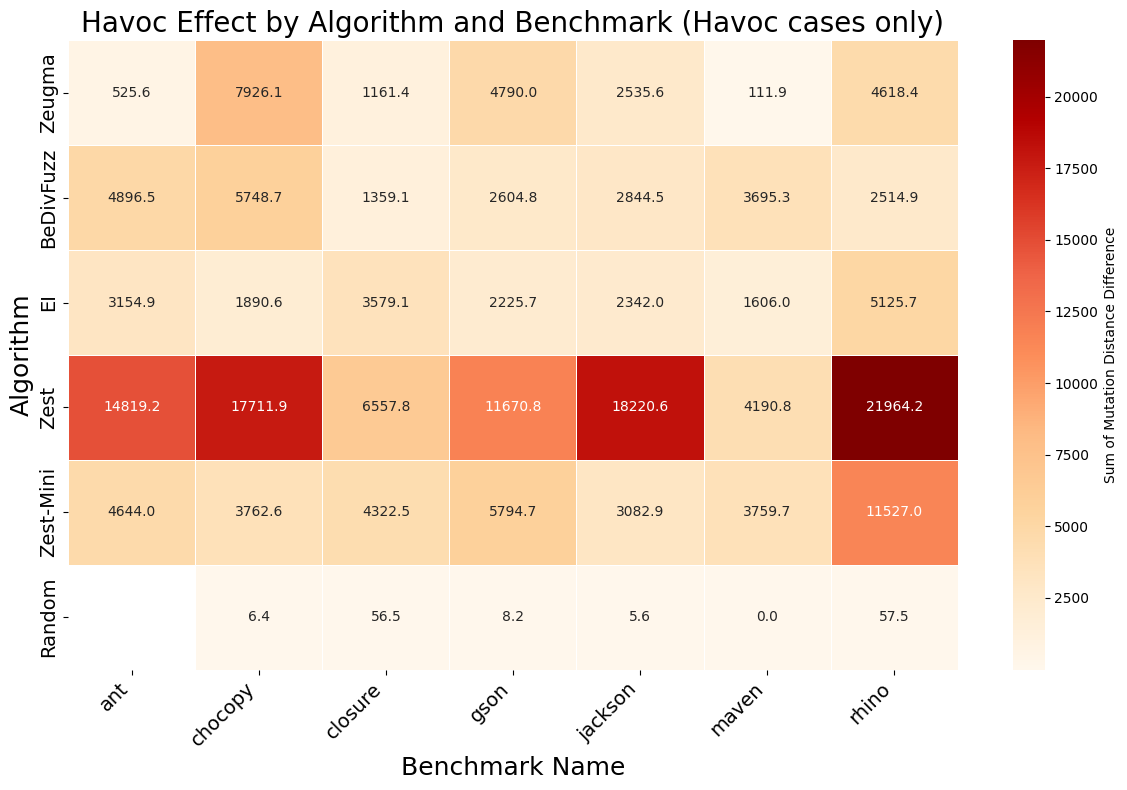

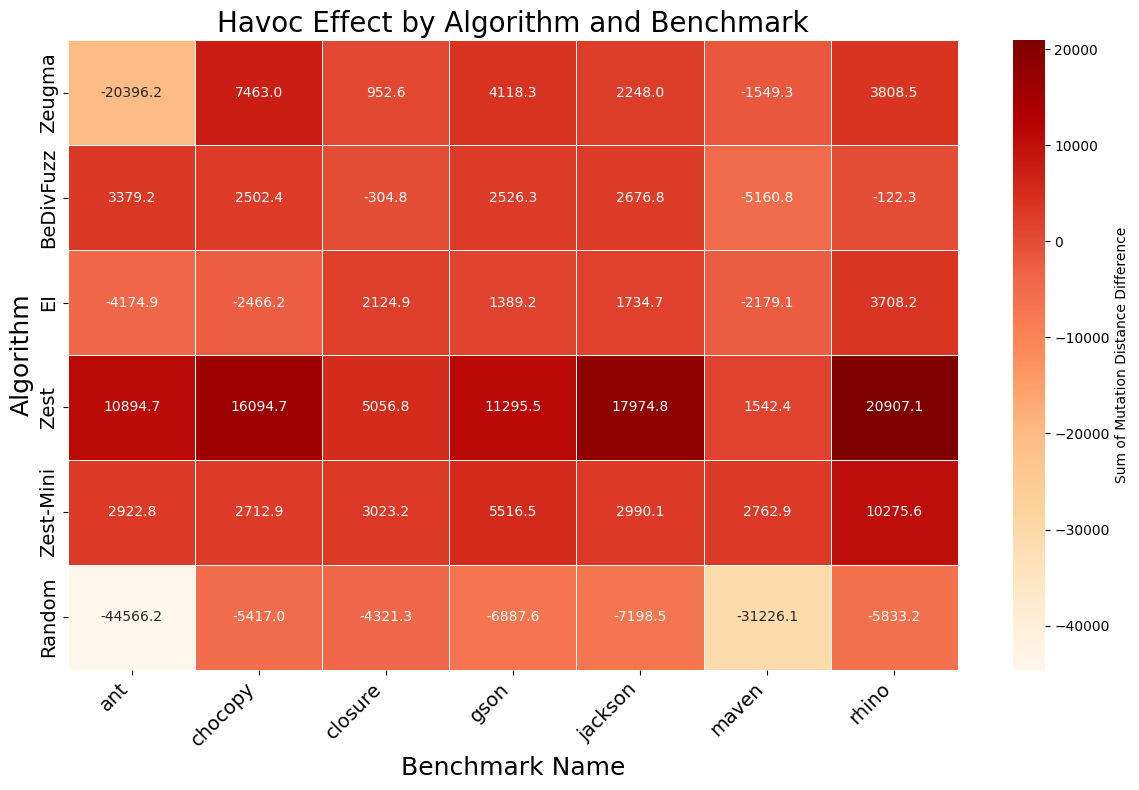

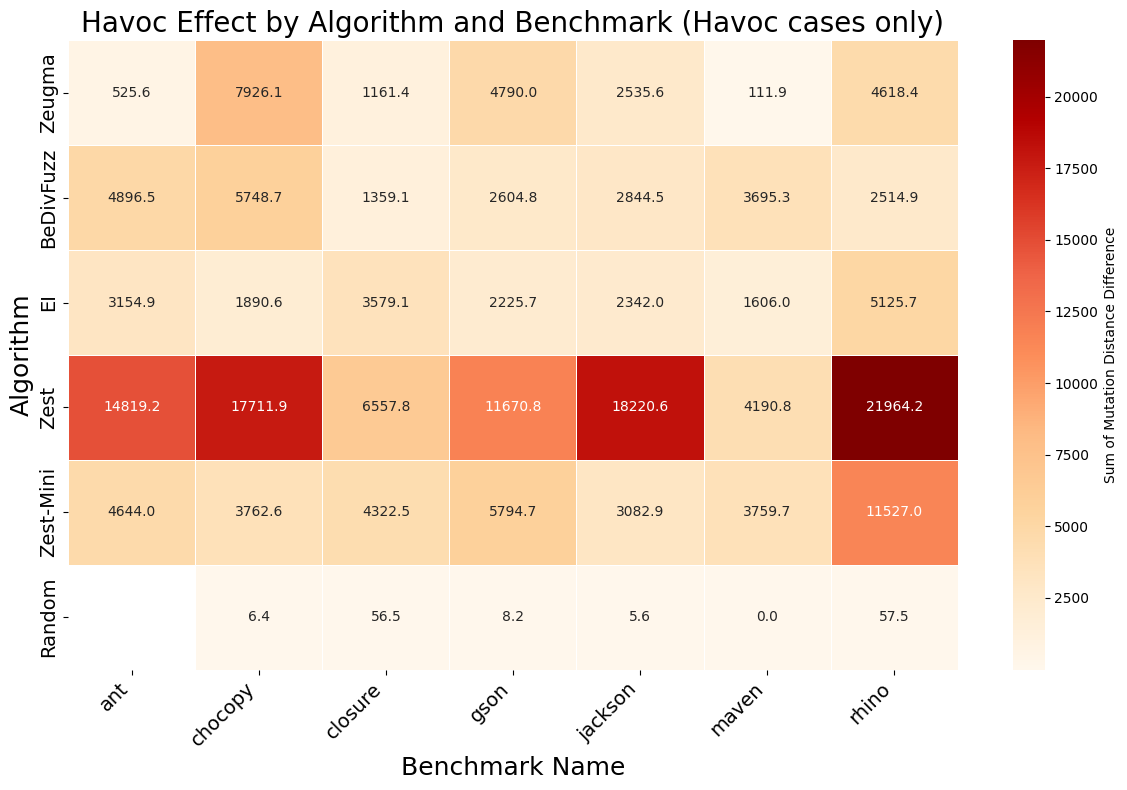

In [27]:
def plot_mutation_dist_heatmap(df, havoc_only=False, figsize=(12, 8), cmap='OrRd', 
                              save_path=None, dpi=300):
    """
    Create a heatmap of summed mutation_distance_diff grouped by algorithm and benchmark_name.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the mutation data with columns:
        'algorithm', 'benchmark_name', 'mutation_distance_diff', 'mutation_string', 'mutation_bytes'
    havoc_only : bool, default=False
        If True, only include rows where mutation_distance_string > mutation_distance_bytes
    figsize : tuple, default=(12, 8)
        Figure size as (width, height) in inches
    cmap : str, default='OrRd'
        Colormap for the heatmap
    save_path : str, default=None
        If provided, save the figure to this path
    dpi : int, default=300
        DPI for saved figure
        
    Returns:
    --------
    matplotlib.figure.Figure
        The figure object containing the heatmap
    """
    # Create a copy to avoid modifying the original dataframe
    data = df.copy()
    
    # Filter for havoc_only if requested
    if havoc_only:
        data = data[data['mutation_string'] > data['mutation_bytes']]
    
    # Step 1: Group by algorithm and benchmark_name, then sum the mutation_distance_diff
    heatmap_data = data.groupby(['algorithm', 'benchmark_name'])['mutation_distance_diff'].sum().reset_index()
    
    # Step 2: Pivot the data for the heatmap
    pivot_data = heatmap_data.pivot(index='algorithm', columns='benchmark_name', values='mutation_distance_diff')
    
    # Order the algorithms as specified
    algorithm_order = ['Random', 'Zest-Mini', 'Zest', 'EI', 'BeDivFuzz', 'Zeugma']
    
    # Filter algorithm_order to include only algorithms present in the data
    available_algorithms = [algo for algo in algorithm_order if algo in pivot_data.index][::-1]   
    pivot_data = pivot_data.reindex(available_algorithms)

    # Step 3: Create the heatmap
    plt.figure(figsize=figsize)
    
    # Create the heatmap with seaborn
    title_suffix = " (Havoc cases only)" if havoc_only else ""
    ax = sns.heatmap(pivot_data, 
                    annot=True,          # Show values in cells
                    fmt='.1f',           # Format with 1 decimal place
                    cmap=cmap,           # Color map
                    linewidths=.5,       # Add lines between cells
                    cbar_kws={'label': 'Sum of Mutation Distance Difference'})
    
    # Improve the plot appearance
    ax.set_title(f'Havoc Effect by Algorithm and Benchmark{title_suffix}', fontsize=20)
    
    # The correct axis labels - algorithms are on Y-axis, benchmarks are on X-axis
    ax.set_ylabel('Algorithm', fontsize=18)  # Y-axis is for algorithms
    ax.set_xlabel('Benchmark Name', fontsize=18)  # X-axis is for benchmarks
    
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    
    # Rotate x-axis labels if they overlap
    plt.xticks(rotation=45, ha='right')
    
    # Add some padding to avoid cutting off labels
    plt.tight_layout()
    
    # Save the figure if requested
    if save_path:
        plt.savefig(save_path, dpi=dpi, bbox_inches='tight')
    
    # Return the figure object
    fig = plt.gcf()
    return fig
plot_mutation_dist_heatmap(all_input_df_nonzero_len, save_path="figs/havoc_mutation_distance_heatmap.pdf")
plot_mutation_dist_heatmap(all_input_df_nonzero_len, havoc_only=True, save_path="figs/havoc_mutation_distance_heatmap_positive_only.pdf")


# Mutation Distance (Byte vs String)

In [7]:

# Define a color palette
palette = sns.color_palette("husl", 6)  # "husl" generates distinct colors

colors = {"Zest": palette[0], "BeDivFuzz": palette[1], "EI": palette[2], "Zeugma": palette[3], "Random": palette[4], "Zest-Mini": palette[5]}

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

def plot_mut_distance_scatter(df, benchmark_name):
    """
    Create scatter plots of mutation distances arranged in 2 rows with 3 plots per row.

    Parameters:
    df (pandas.DataFrame): DataFrame containing mutation data with columns:
        - mutation_bytes
        - mutation_string
        - algorithm
        - benchmark_name
    benchmark_name (str): Name of the benchmark to plot

    Returns:
    matplotlib.figure.Figure: The generated plot
    """
    # Filter data for the specified benchmark
    plot_data = df[df['benchmark_name'] == benchmark_name].copy()
    plt.style.use("default")

    # Get unique algorithms
    algorithms = plot_data['algorithm'].unique()
    num_algorithms = len(algorithms)

    # Define a color palette
    colors = ['#4878CF', '#EE854A', '#D65F5F', '#59A14F', '#B279A2', '#BAB0AC']

    # Calculate rows and columns for the subplots
    rows = 2
    cols = 3

    # Create subplots with 2 rows and 3 columns
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)

    fig.suptitle(f'Mutation Distance of each Technique ({benchmark_name})', fontsize=24, y=0.98)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each algorithm separately with a different color
    for i, (algo, color) in enumerate(zip(algorithms, colors)):
        if i < len(axes):  # Ensure we don't go beyond available axes
            ax = axes[i]
            algo_data = plot_data[plot_data['algorithm'] == algo]
            sns.regplot(
                data=algo_data,
                x='mutation_bytes',
                y='mutation_string',
                scatter=True,
                scatter_kws={'s': 1, 'alpha': 0.5, 'color': color},  # Set scatter color
                line_kws={'color': color},  # Set trendline color
                ci=95,
                ax=ax
            )
            ax.set_title(f'{algo}', fontsize=20)  # Title in matching color
            ax.set_xlabel('Mutation Distance (bytes)', fontsize=18)
            ax.set_ylabel('Mutation Distance (string)', fontsize=18)
            ax.xaxis.set_tick_params(labelsize=14)
            ax.yaxis.set_tick_params(labelsize=14)
            ax.set_ylim(0, 1)
            ax.set_xlim(0, 1)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    return fig

# Generate the plot
# fig = plot_mut_distance_scatter(all_input_df_nonzero_len, "closure")
plt.savefig("figs/mutation_distance_scatter_closure.pdf", dpi=300, bbox_inches='tight')
for benchmark in tqdm.tqdm(all_input_df_nonzero_len['benchmark_name'].unique()):
    fig = plot_mut_distance_scatter(all_input_df, benchmark)
    plt.savefig(f"figs/scatter/mutation_distance_scatter_{benchmark}.pdf", dpi=300, bbox_inches='tight')

 57%|█████████████████████████████████████████████████████████████████████████▋                                                       | 4/7 [00:57<00:39, 13.20s/it]

100%|██████████| 7/7 [18:00<00:00, 154.38s/it]


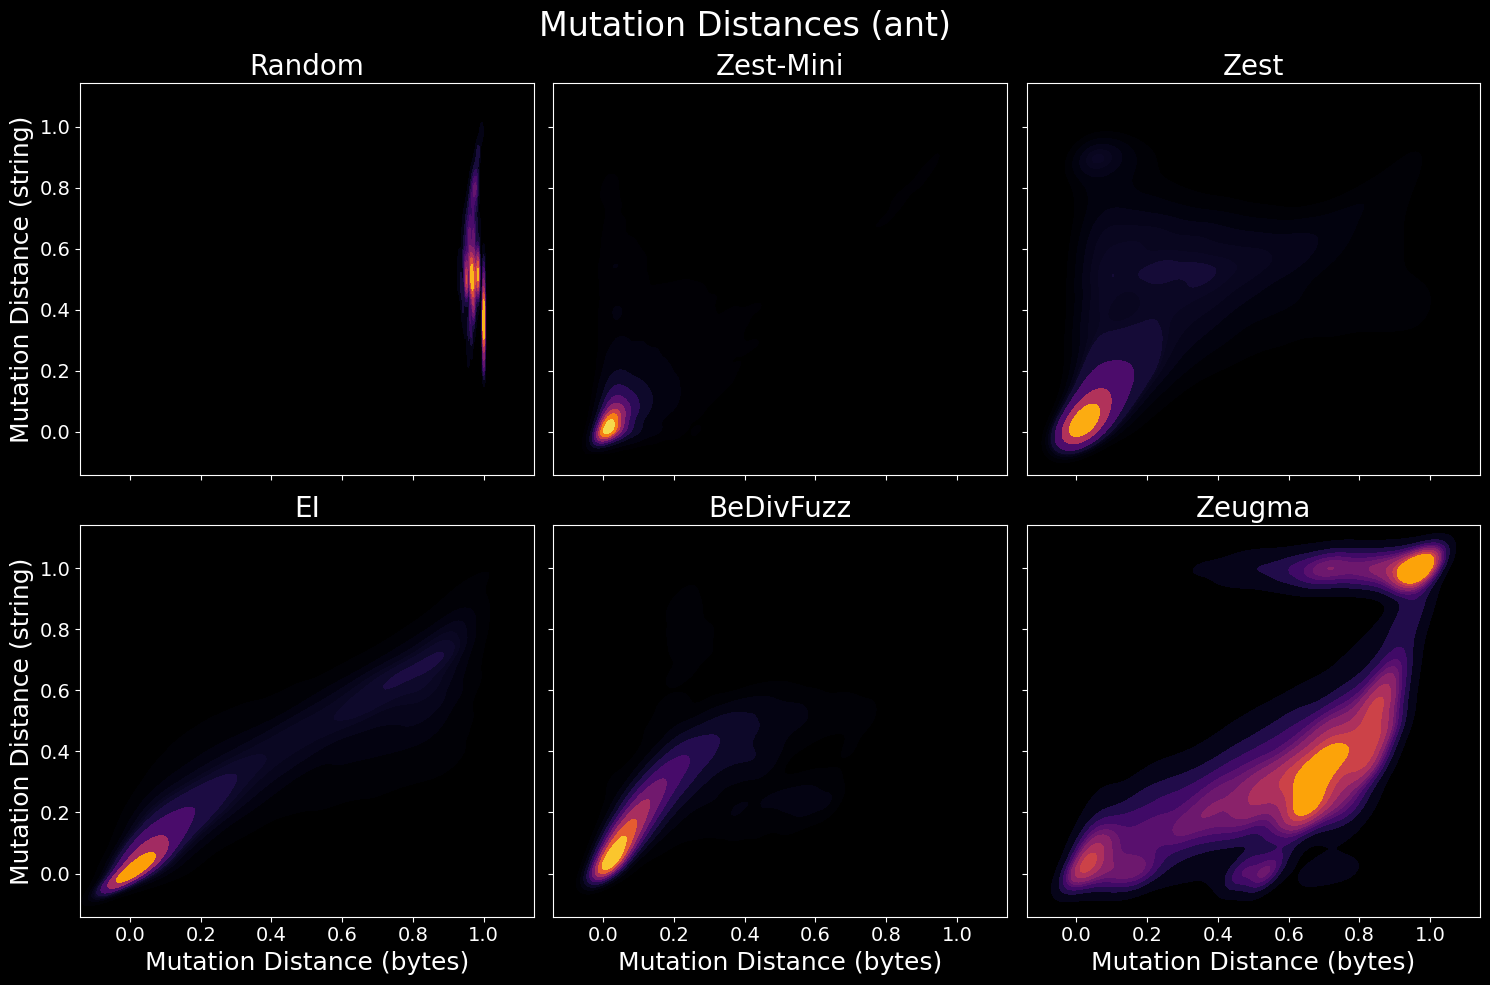

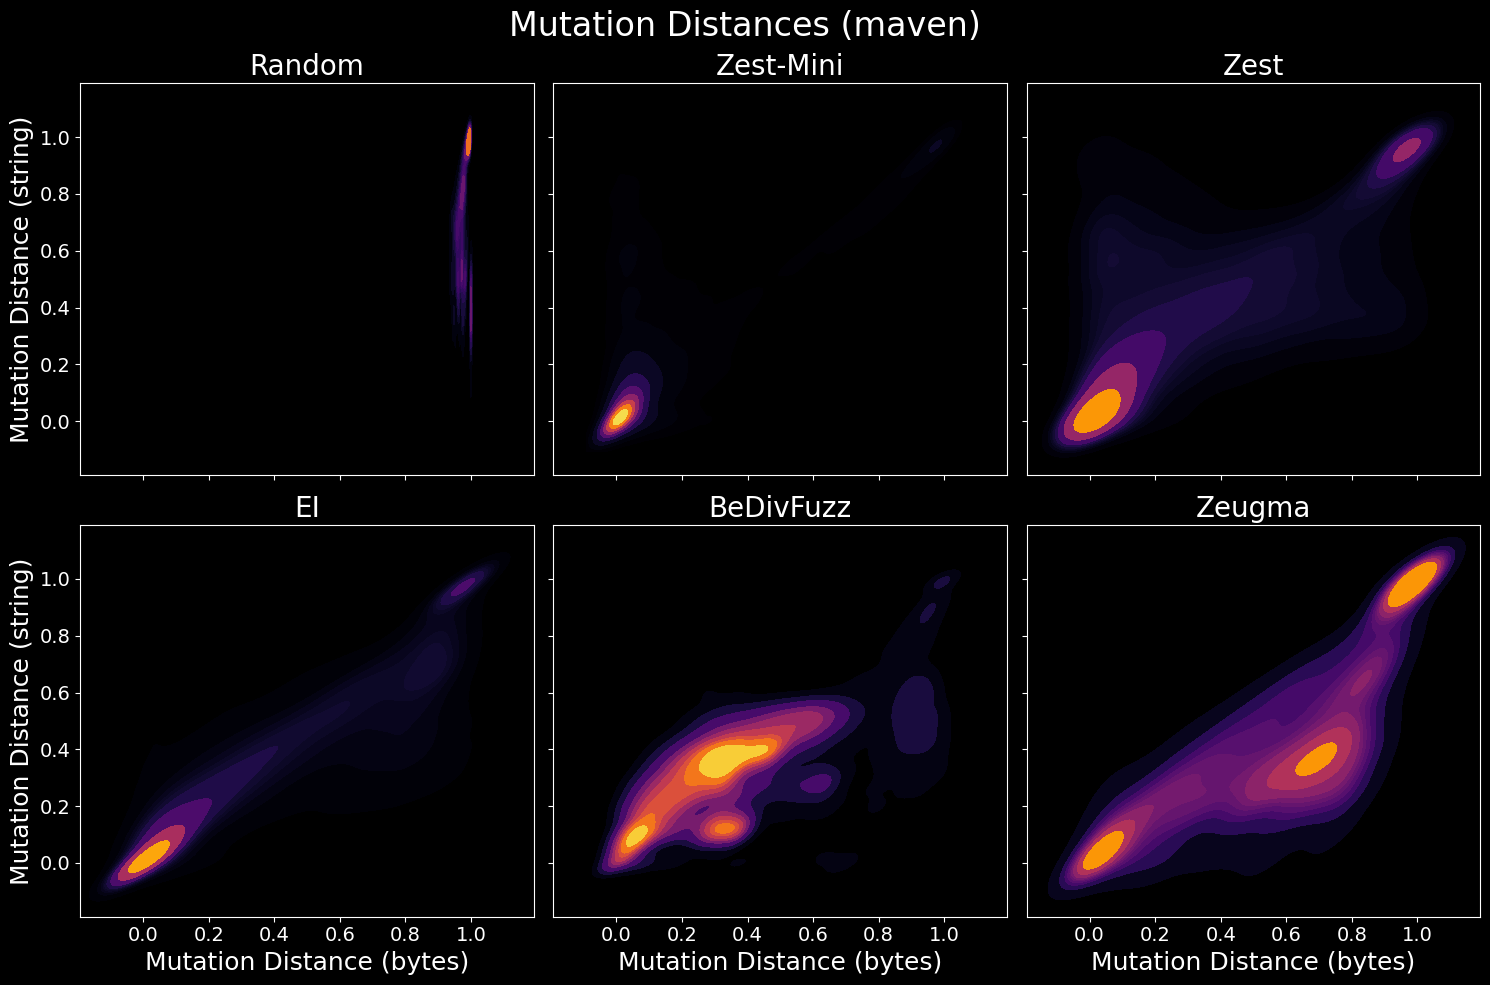

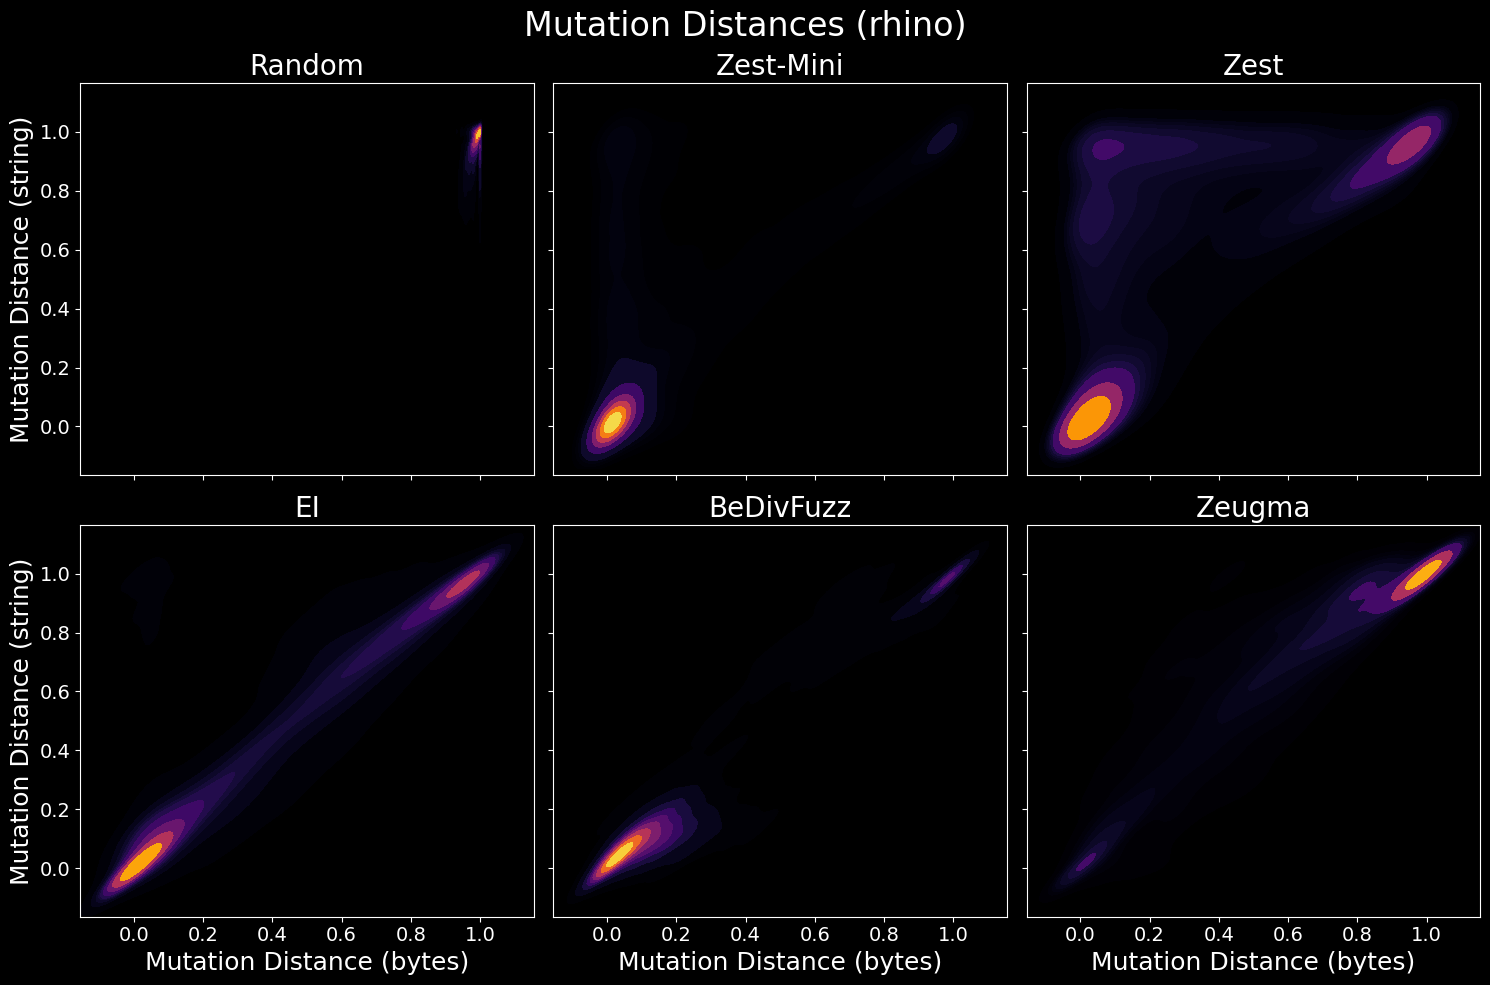

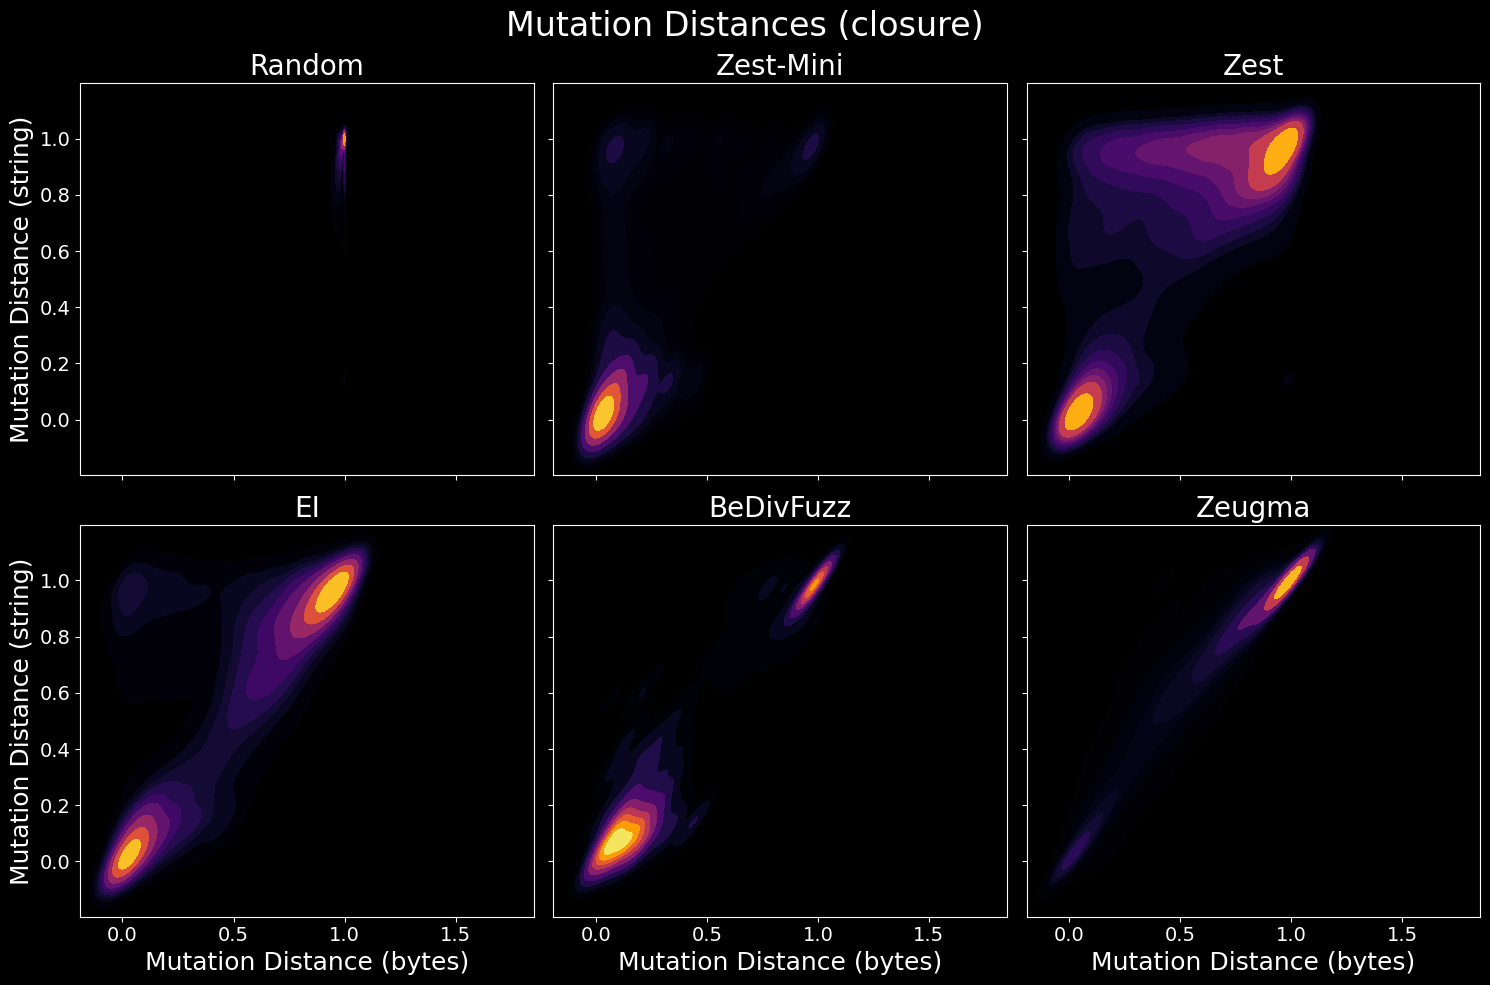

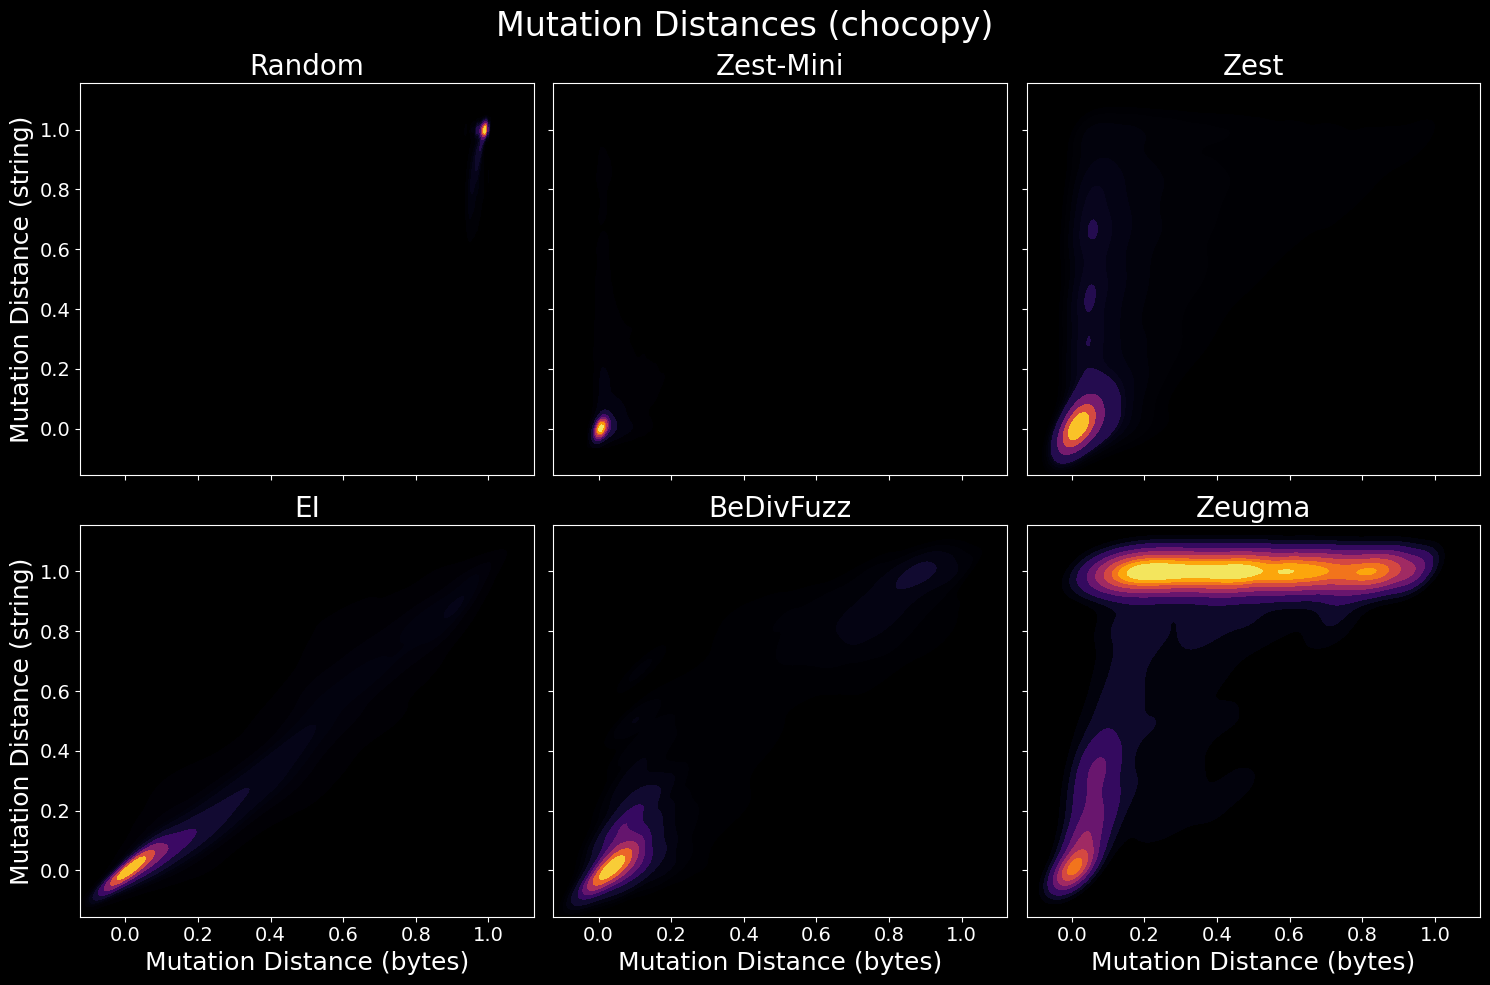

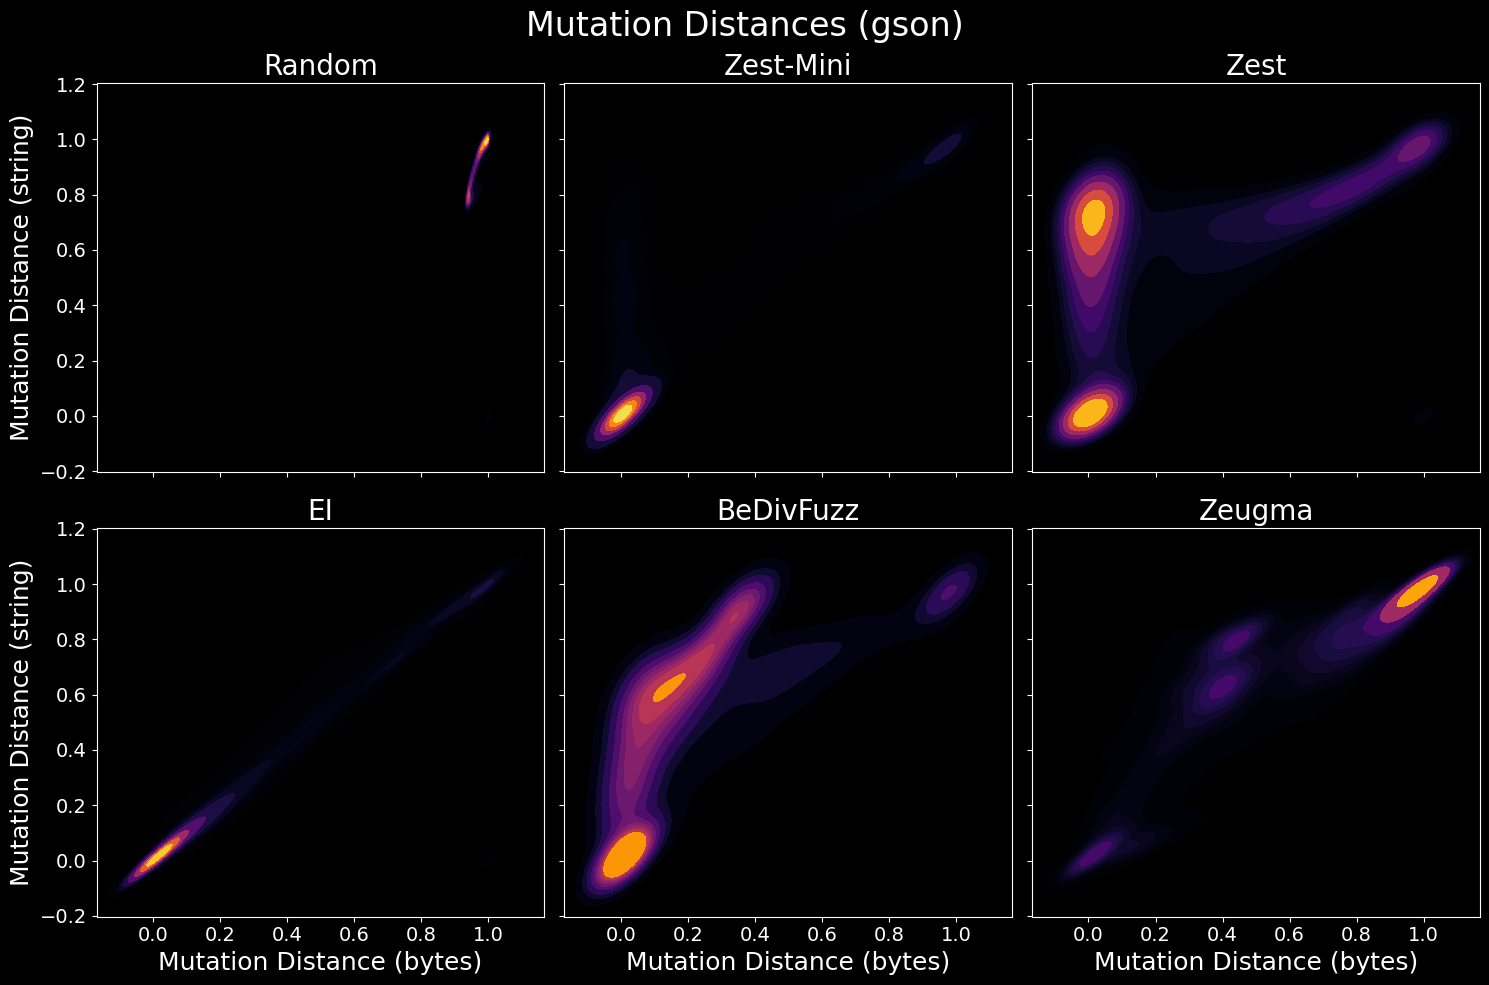

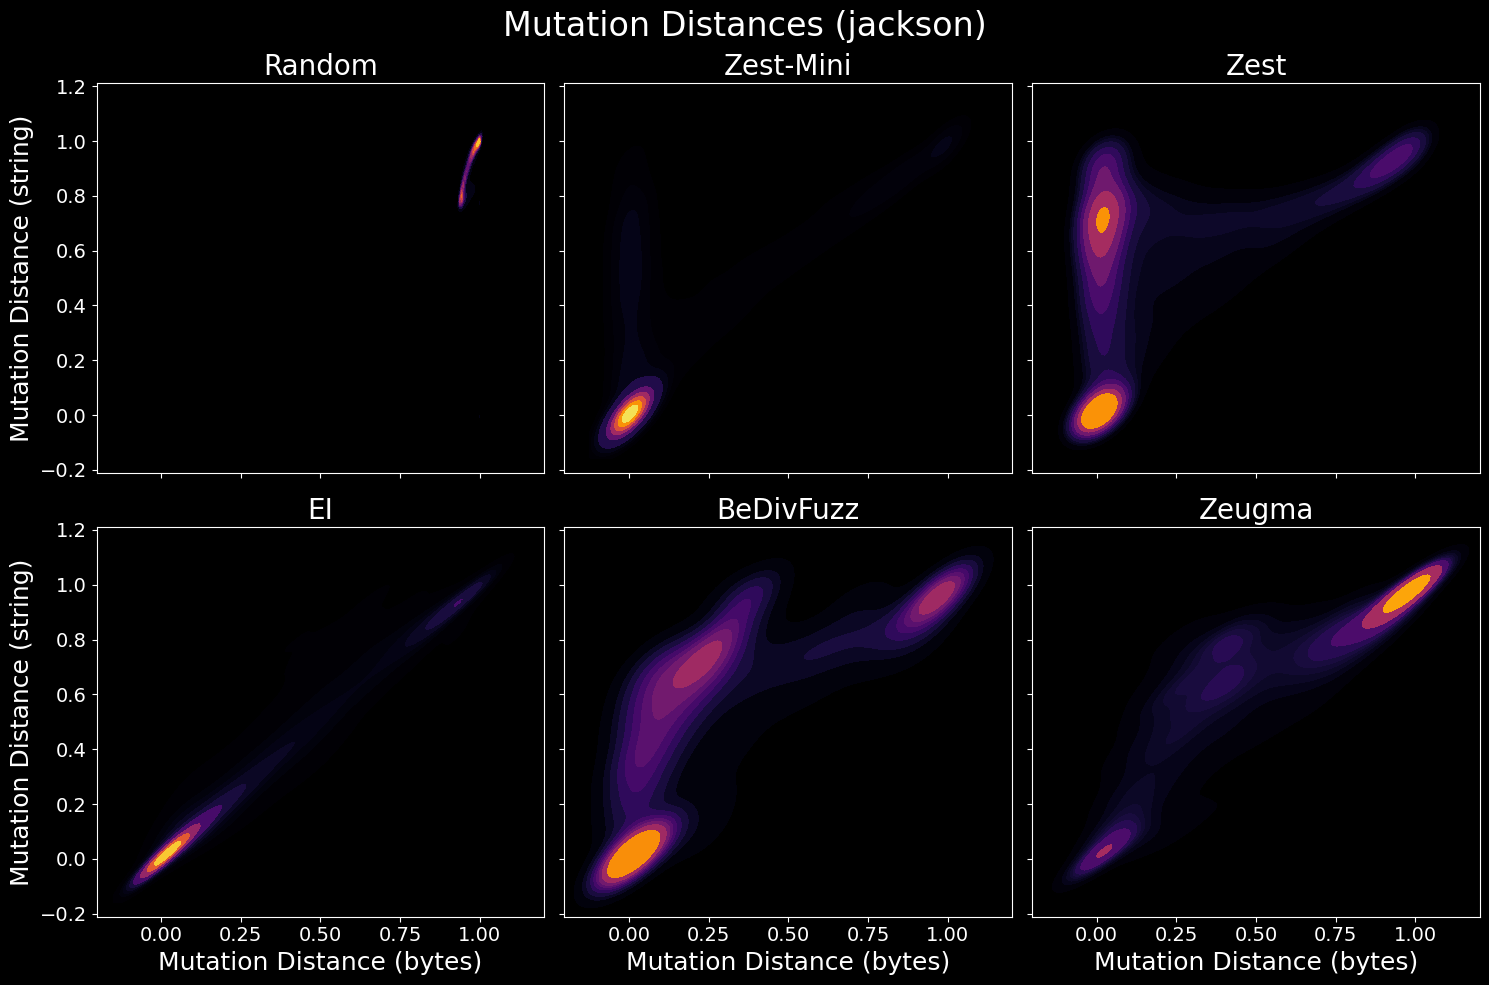

In [29]:
def plot_mut_distance_kde(df, benchmark_name):
    """
    Create 2D KDE heatmaps of mutation distances for each algorithm with a black background.

    Parameters:
    df (pandas.DataFrame): DataFrame containing mutation data with columns:
        - mutation_bytes
        - mutation_string
        - algorithm
        - benchmark_name
    benchmark_name (str): Name of the benchmark to plot

    Returns:
    matplotlib.figure.Figure: The generated plot
    """
    # Set dark background style
    plt.style.use("dark_background")

    # Filter data for the specified benchmark
    plot_data = df[df['benchmark_name'] == benchmark_name].copy()

    # Get unique algorithms
    algorithms = plot_data['algorithm'].unique()
    num_algorithms = len(algorithms)

    # Create subplots
    # fig, axes = plt.subplots(1, num_algorithms, figsize=(5 * num_algorithms, 5), sharex=True, sharey=True)

    if num_algorithms == 1:
        axes = [axes]  # Ensure iterable for a single plot

        # Calculate rows and columns for the subplots
    rows = 2
    cols = 3

    # Create subplots with 2 rows and 3 columns
    fig, axes = plt.subplots(rows, cols, figsize=(15, 10), sharex=True, sharey=True)

    fig.suptitle(f'Mutation Distances ({benchmark_name})', fontsize=24, y=0.98, color='white')


    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Plot each algorithm separately with a different color
    for i, (algo, color) in enumerate(zip(algorithms, palette)):
        if i < len(axes):  # Ensure we don't go beyond available axes
            ax = axes[i]
            ax.grid(False)
            algo_data = plot_data[plot_data['algorithm'] == algo]
            sns.kdeplot(
                data=algo_data,
                x="mutation_bytes",
                y="mutation_string",
                fill=True,  # Color the heatmap
                cmap="inferno",  # Works well with dark backgrounds
                thresh=0.05,  # Control density threshold
                ax=ax
            )
            ax.set_title(f'{algo}', fontsize=20)  # Title in matching color
            ax.set_xlabel('Mutation Distance (bytes)', fontsize=18)
            ax.set_ylabel('Mutation Distance (string)', fontsize=18)
            ax.xaxis.set_tick_params(labelsize=14)
            ax.yaxis.set_tick_params(labelsize=14)
            ax.tick_params(colors='white')


    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    # Adjust layout
    plt.tight_layout()
    return fig

# Loop over all benchmarks and generate the plots
for benchmark in tqdm.tqdm(all_input_df_nonzero_len['benchmark_name'].unique()):
    fig = plot_mut_distance_kde(all_input_df, benchmark)
    plt.savefig(f"figs/heatmap/mutation_distance_kde_{benchmark}.pdf", dpi=300, bbox_inches='tight')

Note: you may need to restart the kernel to use updated packages.


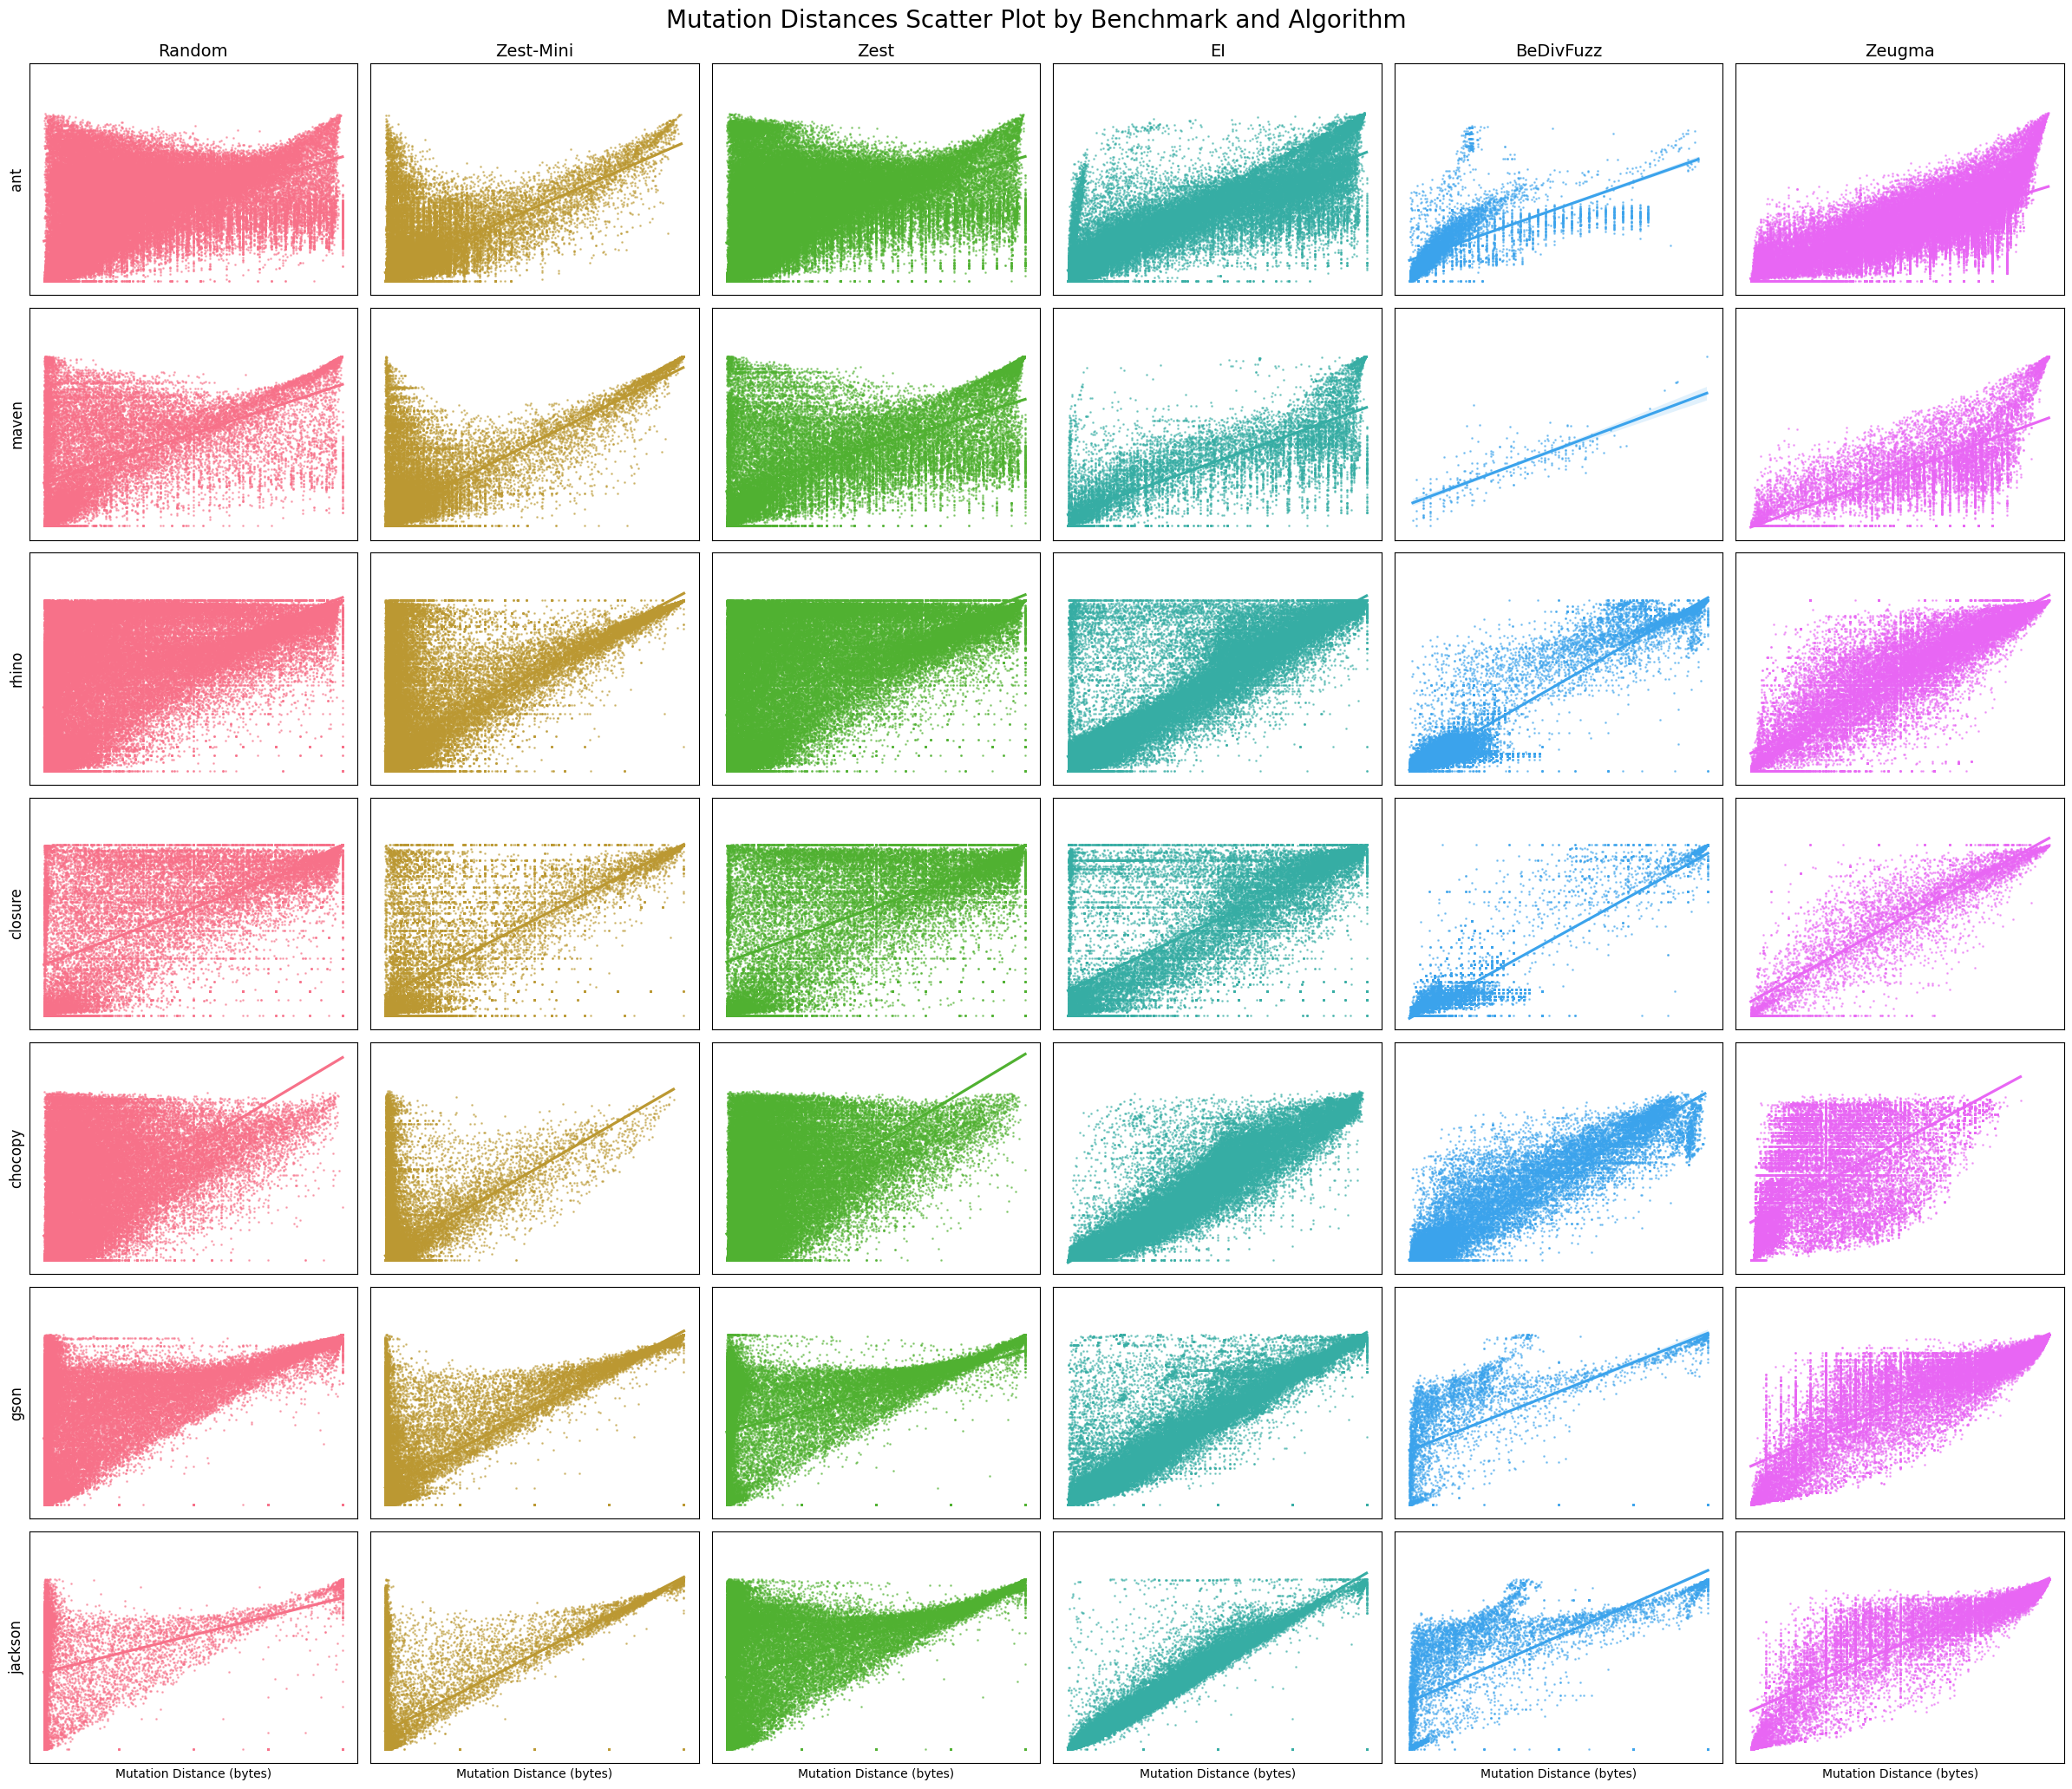

In [ ]:
def plot_mutation_distances(df, plot_type='kde', dark_bg=True, individual_benchmarks=False):
    """
    Create a grid of plots showing mutation distances with benchmarks as rows and algorithms as columns.

    Parameters:
    df (pandas.DataFrame): DataFrame containing mutation data with columns:
        - mutation_bytes
        - mutation_string
        - algorithm
        - benchmark_name
    plot_type (str): Type of plot to create - 'kde' or 'scatter'
    dark_bg (bool): Whether to use a dark background (True) or default style (False)
    individual_benchmarks (bool): Whether to generate individual plots for each benchmark

    Returns:
    dict: Dictionary of generated figures, with 'all' for the combined plot and benchmark names for individual plots
    """
    # Set plotting style
    if dark_bg and plot_type == 'kde':
        plt.style.use("dark_background")
    else:
        plt.style.use("default")

    # Get unique benchmarks and algorithms
    benchmarks = df['benchmark_name'].unique()
    algorithms = df['algorithm'].unique()

    num_benchmarks = len(benchmarks)
    num_algorithms = len(algorithms)

    # Define color palette
    if plot_type == 'kde':
        palette = sns.color_palette("Set2", num_algorithms)
    else:
        palette = sns.color_palette("husl", num_algorithms)

    # Dictionary to store all generated figures
    figures = {}

    # Function to create a single plot (either for combined or individual benchmark)
    def create_plot(plot_df, plot_benchmarks):
        local_num_benchmarks = len(plot_benchmarks)

        # Create subplots grid
        fig, axes = plt.subplots(
            local_num_benchmarks,
            num_algorithms,
            figsize=(4 * num_algorithms, 3 * local_num_benchmarks),
            sharex=True,
            sharey=True
        )

        # If only one benchmark or algorithm, ensure axes is a 2D array
        if local_num_benchmarks == 1:
            axes = np.array([axes])
        if num_algorithms == 1:
            axes = axes.reshape(-1, 1)

        # Plot each benchmark/algorithm combination
        for i, benchmark in enumerate(plot_benchmarks):
            for j, algo in enumerate(algorithms):
                # Select the data for this benchmark/algorithm combination
                subset_data = plot_df[(plot_df['benchmark_name'] == benchmark) & (plot_df['algorithm'] == algo)]

                # Skip if no data for this combination
                if len(subset_data) == 0:
                    text_color = 'white' if dark_bg and plot_type == 'kde' else 'black'
                    axes[i, j].text(0.5, 0.5, "No Data", ha='center', va='center', fontsize=12, color=text_color)
                    continue

                # Create the specified plot type
                if plot_type == 'kde':
                    sns.kdeplot(
                        data=subset_data,
                        x="mutation_bytes",
                        y="mutation_string",
                        fill=True,
                        cmap="inferno" if dark_bg else "viridis",
                        thresh=0.05,
                        ax=axes[i, j]
                    )
                else:  # scatter plot
                    sns.regplot(
                        data=subset_data,
                        x='mutation_bytes',
                        y='mutation_string',
                        scatter=True,
                        scatter_kws={'s': 1, 'alpha': 0.5, 'color': palette[j]},
                        line_kws={'color': palette[j]},
                        ci=95,
                        ax=axes[i, j]
                    )

                # Set title and format axes
                if i == 0:  # Only show algorithm names on the top row
                    axes[i, j].set_title(f'{algo}', fontsize=14)

                if j == 0:  # Only show benchmark names on the leftmost column
                    axes[i, j].set_ylabel(f'{benchmark}', fontsize=12)
                else:
                    axes[i, j].set_ylabel('')

                # Only show x-axis labels on the bottom row
                if i == local_num_benchmarks - 1:
                    axes[i, j].set_xlabel('Mutation Distance (bytes)', fontsize=10)
                else:
                    axes[i, j].set_xlabel('')

                # Customize tick parameters
                text_color = 'white' if dark_bg and plot_type == 'kde' else 'black'
                axes[i, j].tick_params(colors=text_color, labelsize=8)

                # Only show y-axis ticks on the leftmost column
                if j > 0:
                    axes[i, j].set_yticks([])

                # Only show x-axis ticks on the bottom row
                if i < local_num_benchmarks - 1:
                    axes[i, j].set_xticks([])

        # Add a main title
        plot_type_name = "Heatmap" if plot_type == 'kde' else "Scatter Plot"
        if len(plot_benchmarks) == 1:
            title = f'Mutation Distances {plot_type_name} ({plot_benchmarks[0]})'
        else:
            title = f'Mutation Distances {plot_type_name} by Benchmark and Algorithm'

        text_color = 'white' if dark_bg and plot_type == 'kde' else 'black'
        fig.suptitle(title, fontsize=20, y=0.98, color=text_color)

        # Adjust layout
        plt.tight_layout()
        plt.subplots_adjust(top=0.95)  # Make room for the title

        return fig

    # Generate combined plot with all benchmarks
    figures['all'] = create_plot(df, benchmarks)

    # Generate individual benchmark plots if requested
    if individual_benchmarks:
        for benchmark in benchmarks:
            benchmark_df = df[df['benchmark_name'] == benchmark]
            figures[benchmark] = create_plot(benchmark_df, [benchmark])

    return figures

# Example usage:
# Save the combined plot with all benchmarks (as KDE heatmap)
plot_type = "scatter"
figs = plot_mutation_distances(all_input_df_nonzero_len, plot_type=plot_type)
plot_type_name = "heatmap" if plot_type == 'kde' else "scatter"
plt.figure(figs['all'].number)
plt.savefig(f"figs/{plot_type_name}/all_mutation_distance_{plot_type_name}.pdf", dpi=300, bbox_inches='tight')

# # Generate individual benchmark plots
# figs = plot_mutation_distances(all_input_df_nonzero_len, plot_type='scatter', dark_bg=False, individual_benchmarks=True)
# for benchmark, fig in figs.items():
#     if benchmark != 'all':
#         plt.figure(fig.number)
#         plt.savefig(f"figs/scatter/mutation_distance_scatter_{benchmark}.pdf", dpi=300, bbox_inches='tight')

# # You can also generate KDE plots for individual benchmarks
# figs = plot_mutation_distances(all_input_df_nonzero_len, plot_type='kde', dark_bg=True, individual_benchmarks=True)
# for benchmark, fig in figs.items():
#     if benchmark != 'all':
#         plt.figure(fig.number)
#         plt.savefig(f"figs/heatmap/mutation_distance_kde_{benchmark}.pdf", dpi=300, bbox_inches='tight')

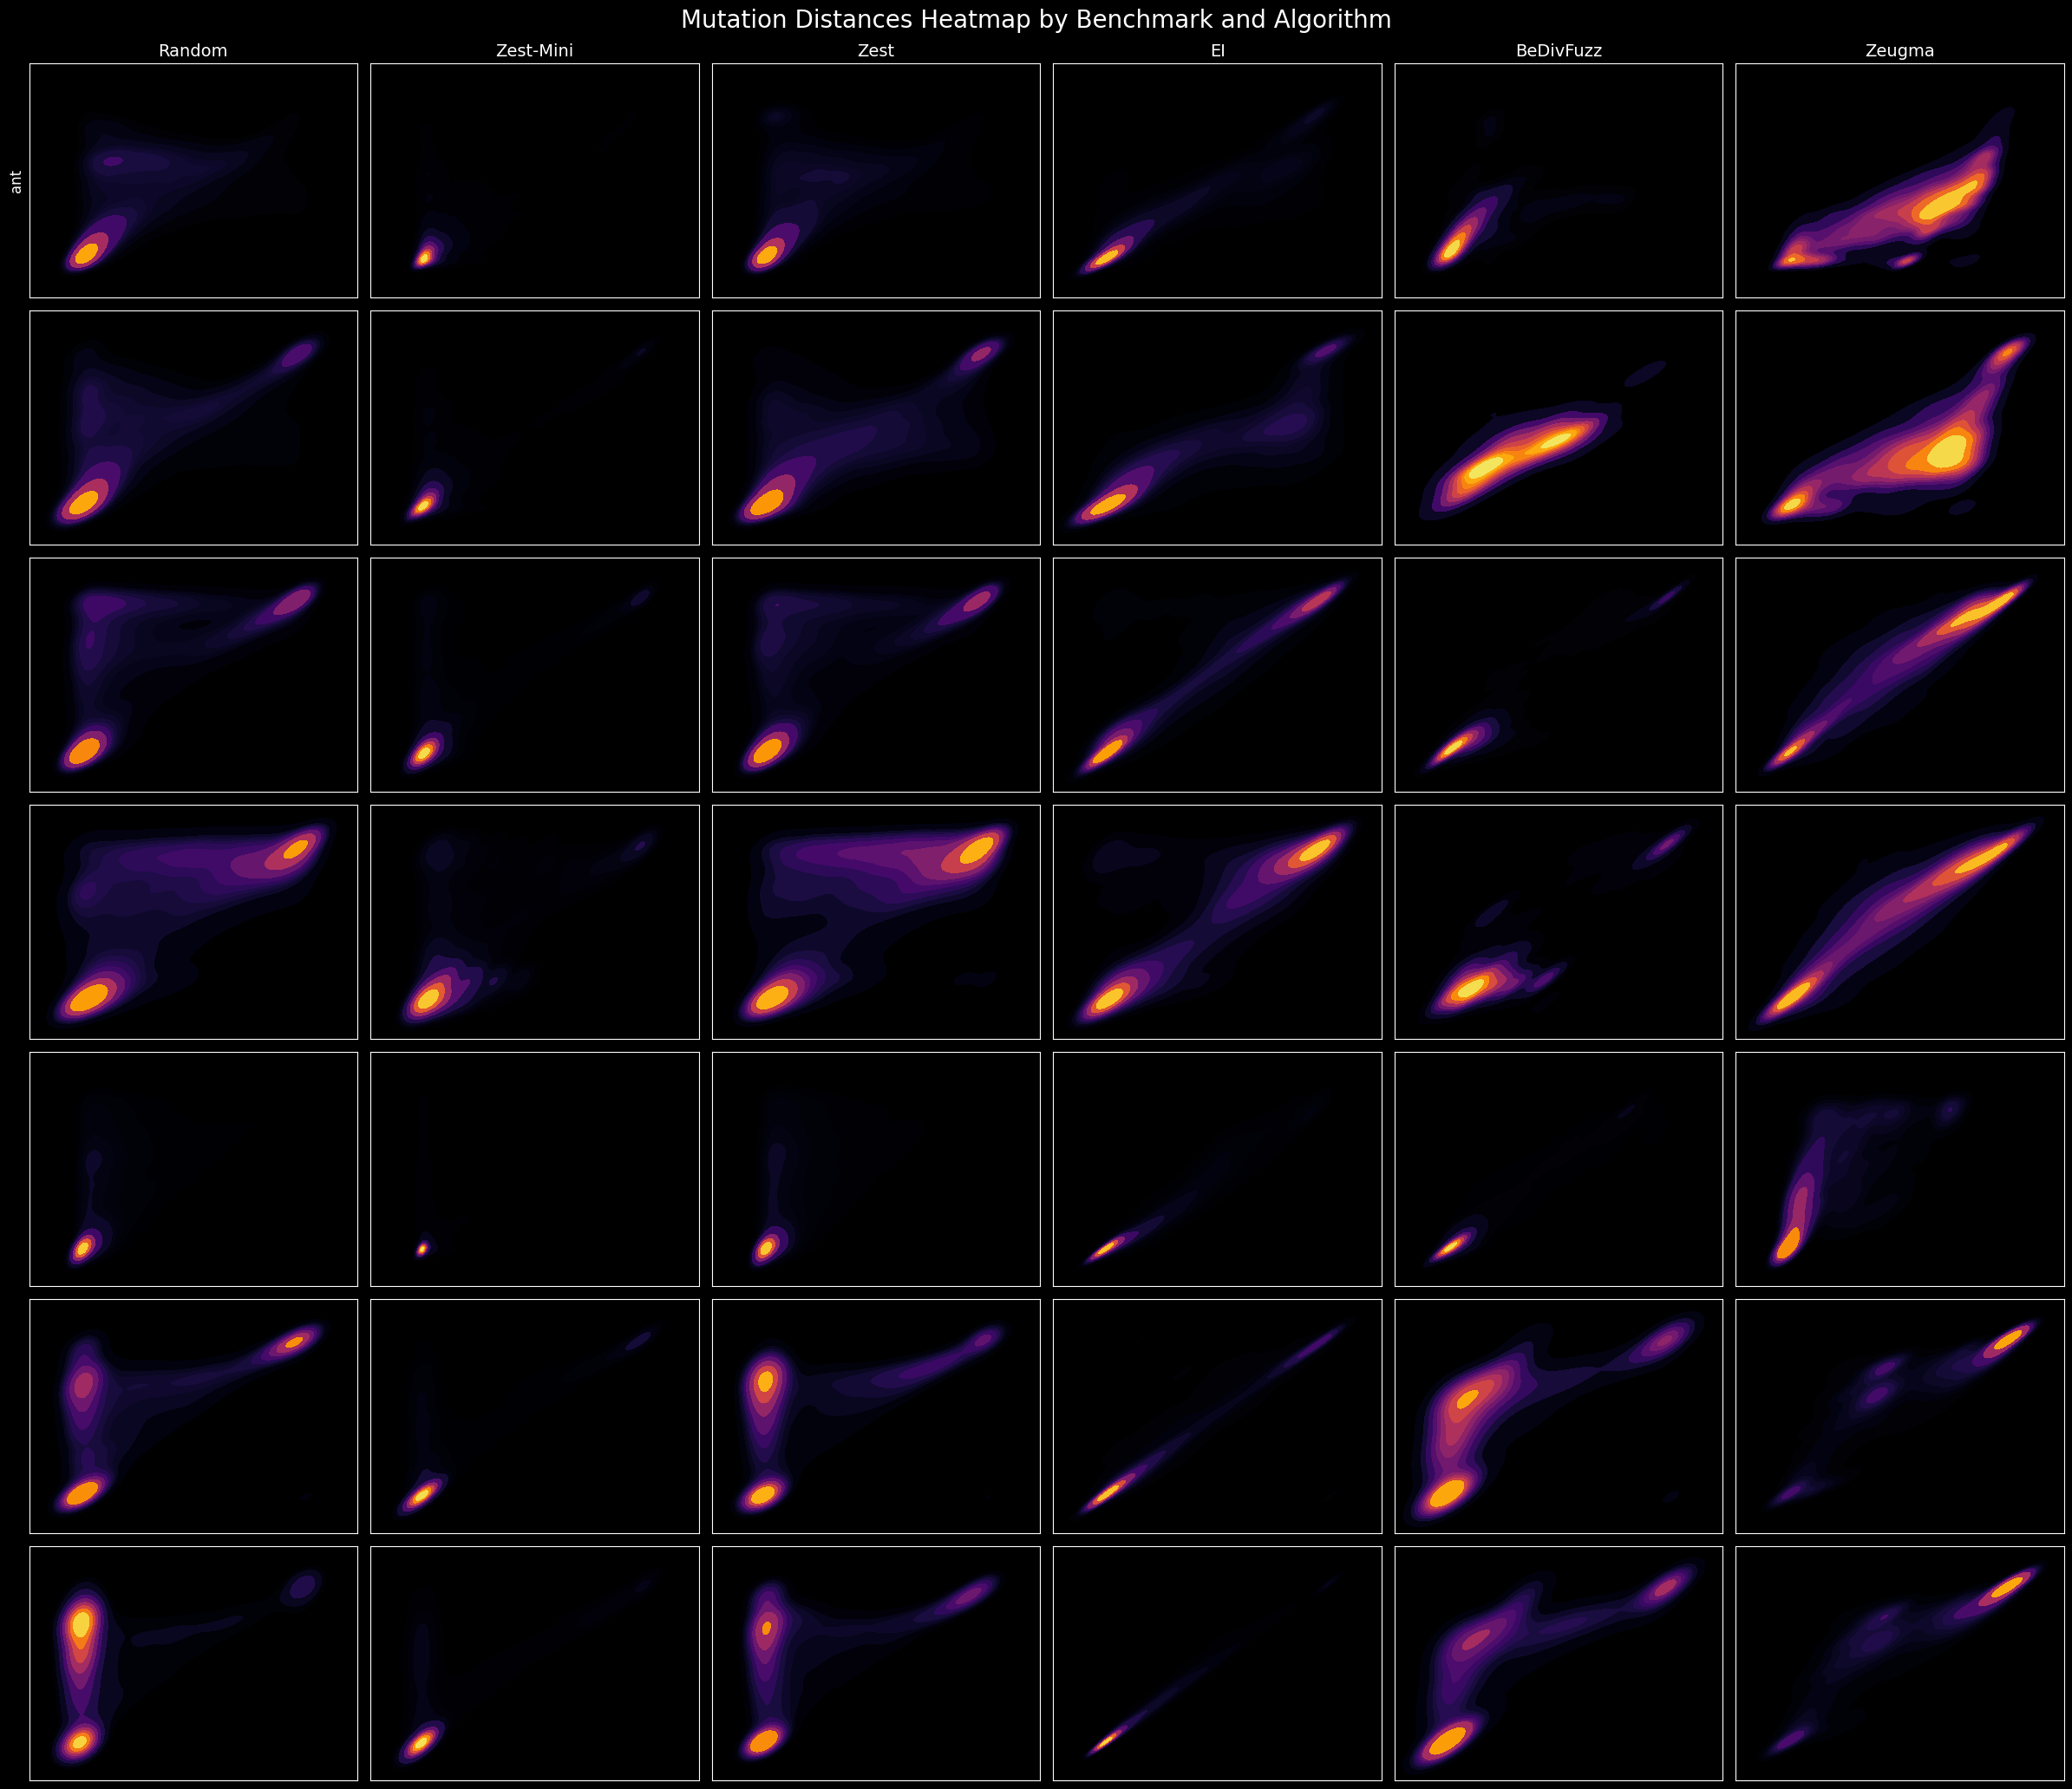

In [209]:
plot_type = "kde"
figs = plot_mutation_distances(all_input_df_nonzero_len, plot_type=plot_type)
plot_type_name = "heatmap" if plot_type == 'kde' else "scatter"
plt.figure(figs['all'].number)
plt.savefig(f"figs/{plot_type_name}/all_mutation_distance_{plot_type_name}.pdf", dpi=300, bbox_inches='tight')


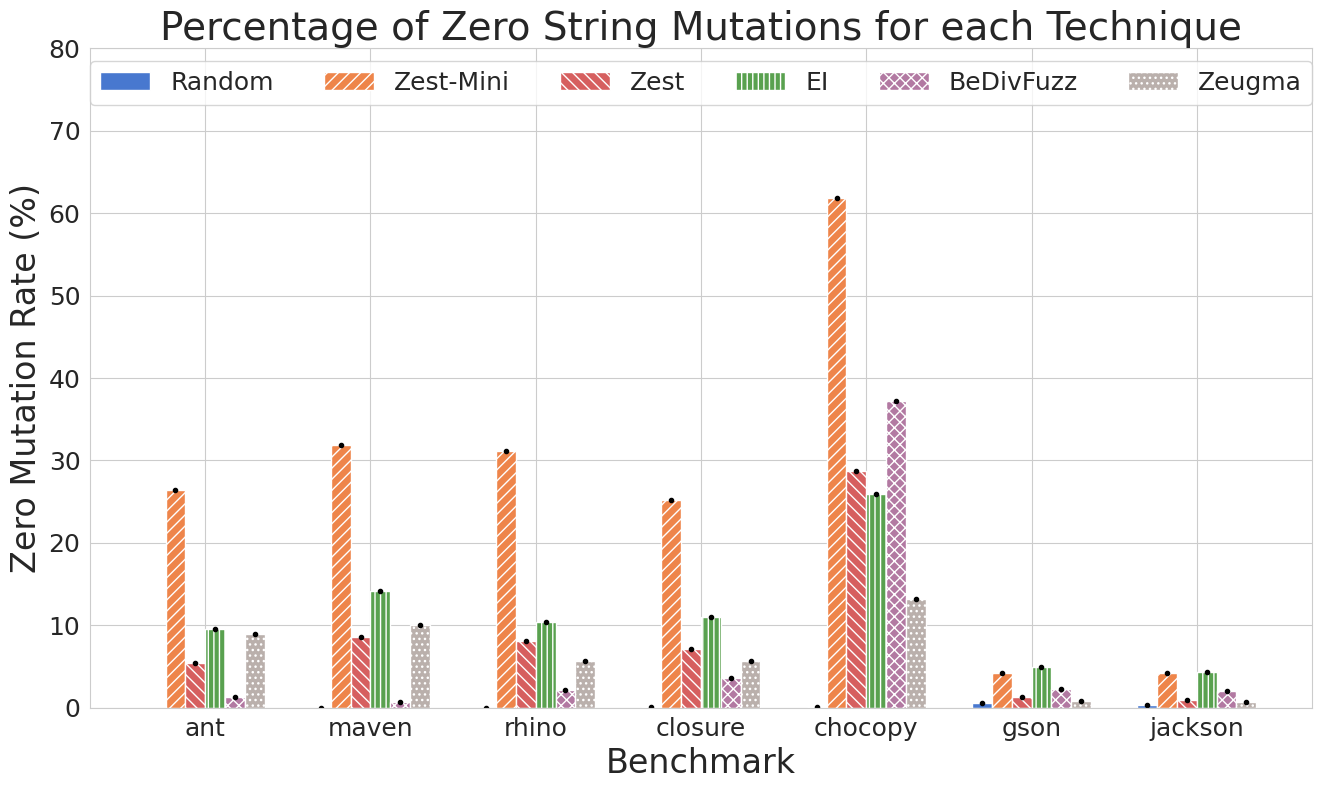

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_zero_mutation_plot(df):
    # Set the style to match the example
    sns.set_style("whitegrid")

    # Filter to include only rows where parent_result == 'SUCCESS'
    filtered_df = df[df['parent_result'] == 'SUCCESS']

    # Calculate the percentage of zero mutations for each benchmark and algorithm
    zero_rates = []
    for benchmark in filtered_df['benchmark_name'].unique():
        benchmark_df = filtered_df[filtered_df['benchmark_name'] == benchmark]

        for algorithm in benchmark_df['algorithm'].unique():
            algo_df = benchmark_df[benchmark_df['algorithm'] == algorithm]

            # Calculate zero mutation rate
            total_rows = len(algo_df)
            zero_rows = len(algo_df[algo_df['mutation_string'] == 0])

            if total_rows > 0:
                zero_rate = zero_rows / total_rows * 100
            else:
                zero_rate = 0

            zero_rates.append({
                'benchmark_name': benchmark,
                'algorithm': algorithm,
                'zero_rate': zero_rate,
                'total_rows': total_rows,
                'zero_rows': zero_rows
            })

    # Convert to DataFrame
    zero_df = pd.DataFrame(zero_rates)

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Get unique benchmarks and use the specified algorithm order
    benchmarks = zero_df['benchmark_name'].unique()
    algorithms = ["Random", "Zest-Mini", "Zest", "EI", "BeDivFuzz", "Zeugma"]

    # Set up the positions for grouped bars
    x = np.arange(len(benchmarks))
    width = 0.12  # Width of each bar

    # Define hatching patterns for bars (similar to the example)
    hatches = ['', '///', '\\\\\\', '|||', 'xxx', '...']

    # Define color palette (adjust to match example more closely)
    colors = ['#4878CF', '#EE854A', '#D65F5F', '#59A14F', '#B279A2', '#BAB0AC']

    # Plot each algorithm group
    for i, algorithm in enumerate(algorithms):
        if algorithm in zero_df['algorithm'].values:
            mask = zero_df['algorithm'] == algorithm
            values = [zero_df[mask & (zero_df['benchmark_name'] == b)]['zero_rate'].values[0]
                     if any(mask & (zero_df['benchmark_name'] == b)) else 0
                     for b in benchmarks]

            bars = ax.bar(x + (i - 2.5) * width, values, width,
                   label=algorithm, color=colors[i])

            # Add hatching to bars
            for bar, hatch in zip(bars, [hatches[i]] * len(bars)):
                bar.set_hatch(hatch)

            # Add data points on top of bars
            for j, val in enumerate(values):
                if val > 0:  # Only add points for non-zero values
                    ax.plot(x[j] + (i - 2.5) * width, val, 'o', color='black', markersize=3)

    # Customize the plot
    ax.set_xticks(x)
    ax.set_xticklabels(benchmarks)
    ax.set_xlabel('Benchmark', fontsize=24)
    ax.set_ylabel('Zero Mutation Rate (%)', fontsize=24)
    ax.set_title('Percentage of Zero String Mutations for each Technique', fontsize=28)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)

    # Add benchmark counts like in the example (ChocoPy (4856), etc.)
    benchmark_counts = {}
    for benchmark in benchmarks:
        count = len(filtered_df[filtered_df['benchmark_name'] == benchmark])
        benchmark_counts[benchmark] = count

    # labels_with_counts = [f"{b}\n({benchmark_counts[b]})" for b in benchmarks]
    # ax.set_xticklabels(labels_with_counts)

    # Set y-axis limits
    ax.set_ylim(0, 80)  # Set to 105 to leave room for data points at the top

    # Add a legend
    ax.legend(loc='upper center',
              ncol=len(algorithms), frameon=True, fontsize=18)

    plt.tight_layout()
    return plt, zero_df

# Usage:
plt, zero_mutation_data = create_zero_mutation_plot(all_input_df_nonzero_len)
plt.savefig("figs/zero_mutations.pdf", bbox_inches='tight')

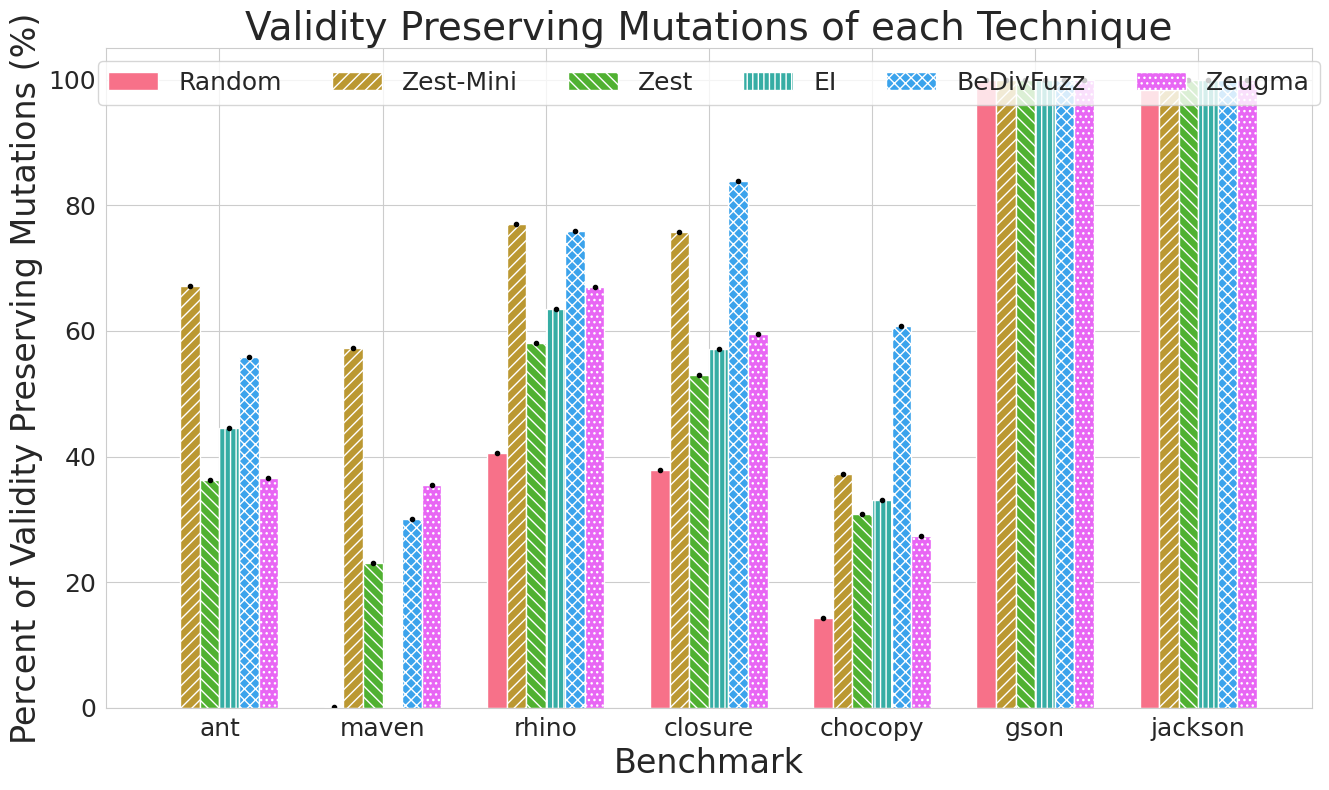

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_success_rate_chart(df, filter_zero=True):
    # Set the style to match the example
    sns.set_style("whitegrid")

    # Filter to include only rows where parent_result == 'SUCCESS'
    filtered_df = df[df['parent_result'] == 'SUCCESS']

    if filter_zero:
        filtered_df = filtered_df[filtered_df["mutation_string"] != 0]

    # Calculate the success rate for each benchmark and algorithm
    success_rates = []
    for benchmark in filtered_df['benchmark_name'].unique():
        benchmark_df = filtered_df[filtered_df['benchmark_name'] == benchmark]

        for algorithm in benchmark_df['algorithm'].unique():
            algo_df = benchmark_df[benchmark_df['algorithm'] == algorithm]

            # Calculate success rate
            total_rows = len(algo_df)
            success_rows = len(algo_df[algo_df['result'] == 'SUCCESS'])

            if total_rows > 0:
                success_rate = success_rows / total_rows * 100
            else:
                success_rate = 0

            success_rates.append({
                'benchmark_name': benchmark,
                'algorithm': algorithm,
                'success_rate': success_rate,
                'total_rows': total_rows,
                'success_rows': success_rows
            })

    # Convert to DataFrame
    success_df = pd.DataFrame(success_rates)

    # Create the plot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Get unique benchmarks and algorithms
    # benchmarks = ['ant', 'maven', 'rhino', 'closure']
    benchmarks = df['benchmark_name'].unique()
    algorithms = ["Random", "Zest-Mini", "Zest", "EI", "BeDivFuzz", "Zeugma"]

    # Set up the positions for grouped bars
    x = np.arange(len(benchmarks))
    width = 0.12  # Width of each bar

    # Define hatching patterns for bars (similar to the example)
    hatches = ['', '///', '\\\\\\', '|||', 'xxx', '...']

    # Define color palette (adjust to match example more closely)
    colors = ['#4878CF', '#EE854A', '#D65F5F', '#59A14F', '#B279A2', '#BAB0AC']

    # Plot each algorithm group
    for i, algorithm in enumerate(algorithms):
        if algorithm in success_df['algorithm'].values:
            mask = success_df['algorithm'] == algorithm
            values = [success_df[mask & (success_df['benchmark_name'] == b)]['success_rate'].values[0]
                     if any(mask & (success_df['benchmark_name'] == b)) else 0
                     for b in benchmarks]

            bars = ax.bar(x + (i - 2.5) * width, values, width,
                   label=algorithm, color=colors[i])

            # Add hatching to bars
            for bar, hatch in zip(bars, [hatches[i]] * len(bars)):
                bar.set_hatch(hatch)

            # Add data points on top of bars
            for j, val in enumerate(values):
                if val > 0:  # Only add points for non-zero values
                    ax.plot(x[j] + (i - 2.5) * width, val, 'o', color='black', markersize=3)

    # Customize the plot
    ax.set_xticks(x)
    ax.set_xticklabels(benchmarks)
    ax.set_xlabel('Benchmark', fontsize=24)
    ax.set_ylabel('Percent of Validity Preserving Mutations (%)', fontsize=24)
    ax.set_title('Validity Preserving Mutations of each Technique', fontsize=28)

    # Add benchmark counts like in the example (ChocoPy (4856), etc.)
    benchmark_counts = {}
    for benchmark in benchmarks:
        count = len(filtered_df[filtered_df['benchmark_name'] == benchmark])
        benchmark_counts[benchmark] = count

    labels_with_counts = [f"{b}\n({benchmark_counts[b]})" for b in benchmarks]
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)

    # Set y-axis limits
    ax.set_ylim(0, 105)  # Set to 105 to leave room for data points at the top

    # Add a legend
    ax.legend(loc='upper center',
              ncol=len(algorithms), frameon=True, fontsize=18)

    plt.tight_layout()
    return plt, success_df

# Usage:
plt, success_data = create_success_rate_chart(all_input_df_nonzero_len)
plt.savefig("figs/mutation_validity.pdf", bbox_inches='tight')

In [179]:
all_input_df_nonzero_len[(all_input_df_nonzero_len["algorithm"] == "Zeugma") & (all_input_df_nonzero_len["result"] == "FAILURE")]

mutation_bytes  mutation_string algorithm  current_len  parent_len  \
1421984        0.201613         0.366667    Zeugma           81          90   
1422476        0.049180         0.048193    Zeugma           83          81   
1424316        0.000000         0.000000    Zeugma           83          83   
1424536        0.068376         0.048193    Zeugma           82          83   
1425472        0.000000         0.000000    Zeugma           82          82   
...                 ...              ...       ...          ...         ...   
1456062        0.521127         0.560976    Zeugma           41          21   
1456426        0.613208         0.725000    Zeugma           80          25   
1457117        0.622807         0.690141    Zeugma           71          30   
1457756        0.654545         0.724138    Zeugma           29          11   
1458487        0.045455         0.080000    Zeugma           25          25   

         saved  parent   result parent_result benchmark_name  
1421984   True    8321  FAILURE       SUCCESS          rhino  
1422476   True   10359  FAILURE       FAILURE          rhino  
1424316  False   10853  FAILURE       FAILURE          rhino  
1424536   True   10853  FAILURE       FAILURE          rhino  
1425472  False   12917  FAILURE       FAILURE          rhino  
...        ...     ...      ...           ...            ...  
1456062  False   29011  FAILURE       SUCCESS          rhino  
1456426  False   36789  FAILURE       FAILURE          rhino  
1457117  False   44950  FAILURE       SUCCESS          rhino  
1457756  False    5313  FAILURE       SUCCESS          rhino  
1458487  False   36789  FAILURE       FAILURE          rhino  

[69 rows x 10 columns]

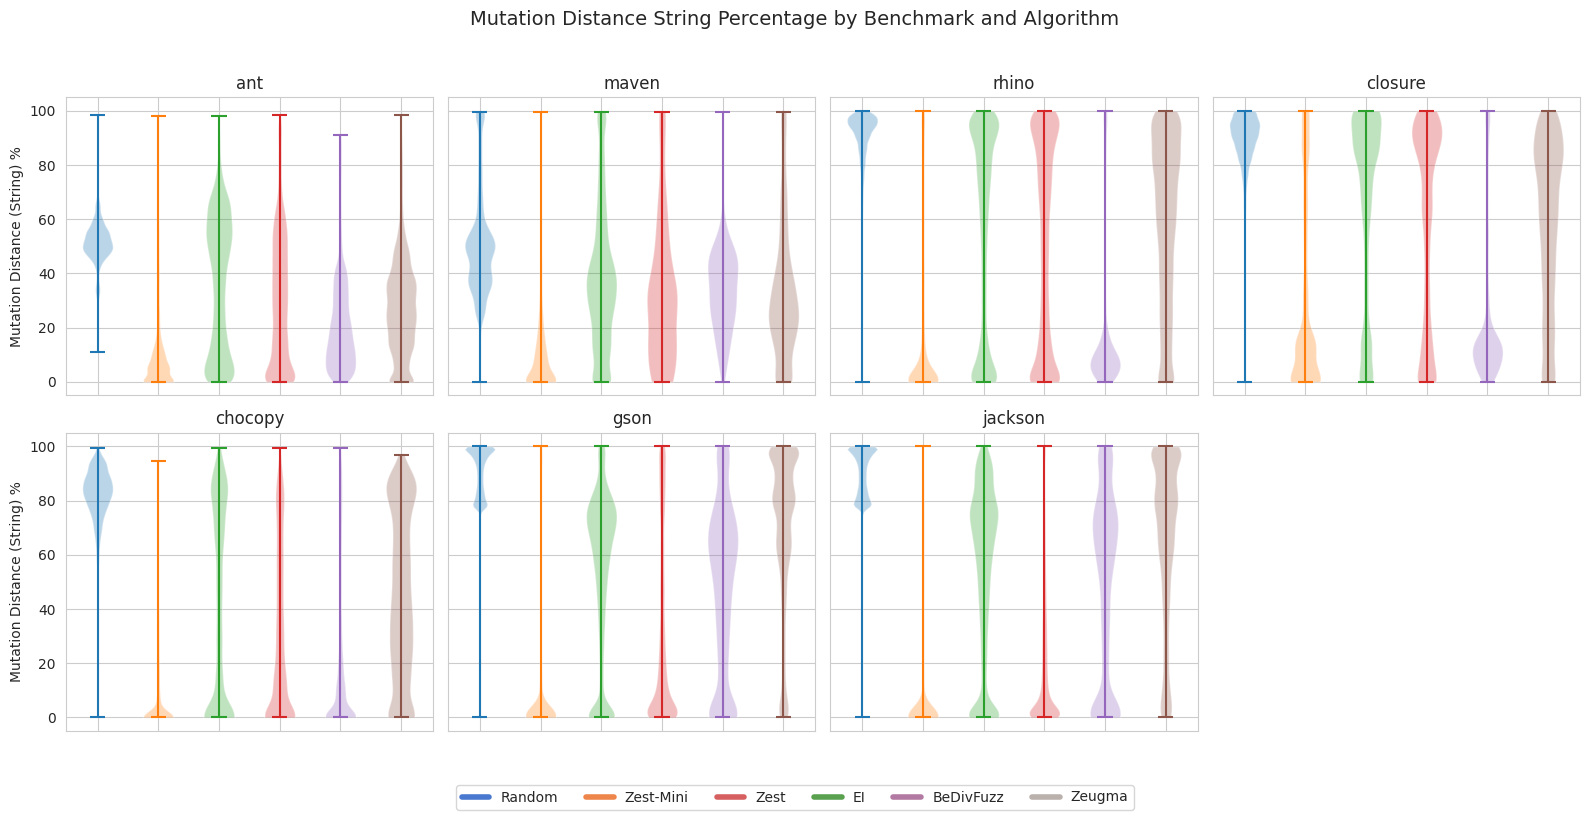

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def create_compact_violin_plots(df):
    # Define algorithm order
    algorithms = ["Random", "Zest-Mini", "Zest", "EI", "BeDivFuzz", "Zeugma"]

    # Define colors for algorithms (matching bar plot)
    colors = ['#4878CF', '#EE854A', '#D65F5F', '#59A14F', '#B279A2', '#BAB0AC']
    algo_colors = dict(zip(algorithms, colors))

    # Filter to include only rows where parent_result == 'SUCCESS'
    filtered_df = df[df['parent_result'] == 'SUCCESS'].copy()

    # Create mutation_string_pct column (multiplied by 100)
    filtered_df['mutation_string_pct'] = filtered_df['mutation_string'] * 100

    # Get benchmarks
    benchmarks = filtered_df['benchmark_name'].unique()

    # Calculate layout (2 rows, with benchmarks divided between them)
    n_benchmarks = len(benchmarks)
    cols_per_row = int(np.ceil(n_benchmarks / 2))

    # Set up figure
    fig, axes = plt.subplots(2, cols_per_row, figsize=(4*cols_per_row, 8), sharey=True)
    axes = axes.flatten()  # Flatten for easier indexing

    # For each benchmark, create a subplot with violins for each algorithm
    for i, benchmark in enumerate(benchmarks):
        ax = axes[i]
        benchmark_df = filtered_df[filtered_df['benchmark_name'] == benchmark]

        # Plot each algorithm as a separate violin
        positions = range(len(algorithms))
        for j, algorithm in enumerate(algorithms):
            algo_df = benchmark_df[benchmark_df['algorithm'] == algorithm]

            if not algo_df.empty:
                # Create violin plot for this algorithm
                parts = ax.violinplot(
                    [algo_df['mutation_string_pct']],
                    positions=[j],
                )

                # Set violin color
                # for pc in parts['bodies']:
                #     pc.set_facecolor(algo_colors[algorithm])
                #     pc.set_alpha(0.7)

                # # Add small box plot for the median
                # ax.boxplot(
                #     [algo_df['mutation_string_pct']],
                #     positions=[j],
                #     widths=0.3,
                #     showcaps=False,
                #     showfliers=False,
                #     medianprops={'color': 'black'},
                #     boxprops={'color': 'black', 'facecolor': 'none'},
                #     whiskerprops={'color': 'none'}
                # )

        # Set subplot title and labels
        ax.set_title(benchmark, fontsize=12)
        # ax.set_xticks(range(len(algorithms)))
        ax.set_xticklabels([])  # Abbreviate names

        # Only show y-label on leftmost plots
        if i % cols_per_row == 0:
            ax.set_ylabel('Mutation Distance (String) %')

    # Remove empty subplots if any
    for i in range(n_benchmarks, len(axes)):
        fig.delaxes(axes[i])

    # Add a legend
    handles = [plt.Line2D([0], [0], color=algo_colors[a], lw=4, label=a) for a in algorithms]
    fig.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, 0.02),
              ncol=len(algorithms), frameon=True, fontsize=10)

    # Add an overall title
    fig.suptitle('Mutation Distance String Percentage by Benchmark and Algorithm', fontsize=14)

    # Adjust layout
    plt.tight_layout(rect=[0, 0.06, 1, 0.96])  # Make room for title and legend
    return plt

# Usage:
plt = create_compact_violin_plots(all_input_df_nonzero_len)
plt.savefig("violin_plot_mut_distance_string.pdf", bbox_inches='tight')

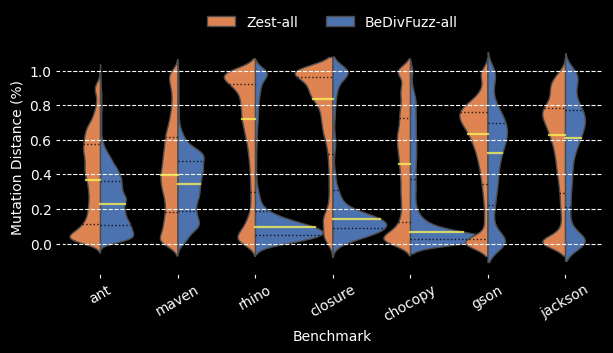

In [14]:
x_order = ('ant', 'maven', 'rhino', 'closure', 'chocopy', 'gson', 'jackson')
zest_versus_bedivfuzz = non_zero_all_input_df[non_zero_all_input_df['algorithm'].str.contains('Zest|BeDivFuzz')]
violin_plot_for_mutation_distance(zest_versus_bedivfuzz, "t1", 'rq2_wo_zero_mutations_2', width=2.0, x_order=x_order)

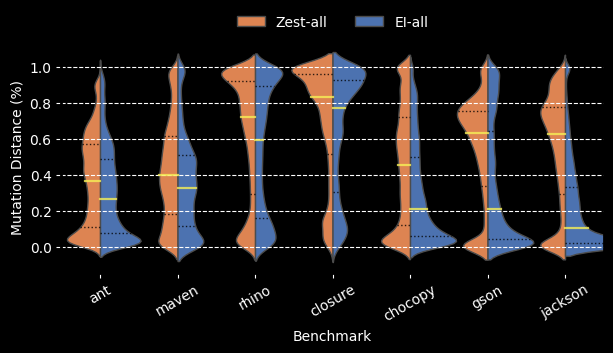

In [15]:
zest_versus_ei = non_zero_all_input_df[non_zero_all_input_df['algorithm'].str.contains('Zest|EI')]
violin_plot_for_mutation_distance(zest_versus_ei, "t1", 'rq2_wo_zero_mutations_2', width=2.0, x_order=x_order)

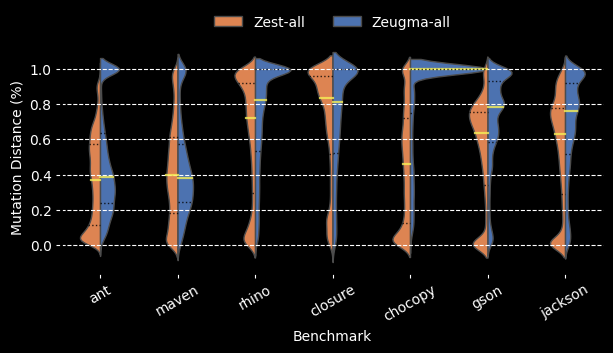

In [16]:
zest_versus_zeugma = non_zero_all_input_df[non_zero_all_input_df['algorithm'].str.contains('Zest|Zeugma')]
violin_plot_for_mutation_distance(zest_versus_zeugma, "t1", 'rq2_wo_zero_mutations_2', width=2.0, x_order=x_order)

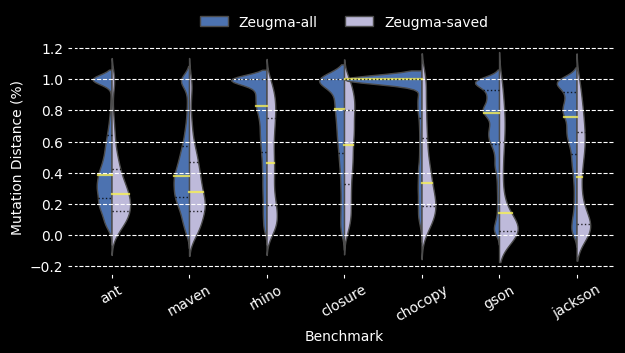

In [17]:
non_zero_zeugma_df = non_zero_mutation_df[non_zero_mutation_df['algorithm'].str.contains('Zeugma')]
violin_plot_for_mutation_distance(non_zero_zeugma_df, "t1", 'rq2_wo_zero_mutations_2', width=2.0, x_order=x_order)